# Import Libraries

In [1]:
import sys
import os
import sqlite3
import warnings
import json

import pandas as pd
import numpy as np

import optuna
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier # Changed from ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFECV


warnings.filterwarnings('ignore')
np.random.seed(42)

/home/pooya/w/DroughtMonitoringIran/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Database

In [2]:
sys.path.append('/home/pooya/w/DroughtMonitoringIran/')

DATABASE_PATH = "./database/database.db"

RESULTS_DIR = 'results'

os.makedirs(RESULTS_DIR, exist_ok=True)

conn = sqlite3.connect(DATABASE_PATH)

data = pd.read_sql(sql='SELECT * FROM data', con=conn)

conn.close()

No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (679, 142)
Testing set shape: (291, 142)
Optimal number of features found: 22
Selected features: ['GPM_SPEI_9', 'ERA5_SPEI_9', 'LST', 'GPM_SPEI_9_lag_1', 'ERA5_SPEI_9_lag_1', 'GPM_SPEI_9_lag_2', 'GPM_SPEI_9_lag_3', 'GPM_SPEI_9_roll_mean_3', 'GPM_SPEI_9_roll_std_3', 'ERA5_SPEI_9_roll_mean_3', 'PCI_GPM_roll_mean_3', 'VHI_roll_mean_3', 'CI_ERA5_roll_mean_3', 'GPM_Precipitation_roll_std_6', 'GPM_SPEI_9_roll_mean_6', 'ERA5_SPEI_9_roll_mean_6', 'ERA5_SPEI_9_roll_std_6', 'PCI_ERA5_roll_mean_6', 'VCI_roll_std_6', 'VHI_roll_mean_6', 'CI_GPM_roll_mean_6', 'CI_ERA5_roll_mean_6']
Selected features saved to results/G2/SPEI_9/selected_features.txt


[I 2025-08-23 09:12:55,706] A new study created in memory with name: no-name-aa510989-ace9-4bc5-971e-54d6b24d8b0c
[I 2025-08-23 09:12:56,726] Trial 0 finished with value: 0.3847681962946027 and parameters: {'n_estimators': 69, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 0.190327540121827, 'criterion': 'entropy'}. Best is trial 0 with value: 0.3847681962946027.
[I 2025-08-23 09:13:02,035] Trial 1 finished with value: 0.2954041011333435 and parameters: {'n_estimators': 434, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 18, 'max_features': 0.9201031492146516, 'criterion': 'entropy'}. Best is trial 0 with value: 0.3847681962946027.
[I 2025-08-23 09:13:04,203] Trial 2 finished with value: 0.38935004549912994 and parameters: {'n_estimators': 170, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.5105663811049959, 'criterion': 'gini'}. Best is trial 2 with value: 0.38935004549912994.
[I 2025-08-23 09:13:08,515

Best parameters saved to results/G2/SPEI_9/best_params.json
Best trial found: 95
Best Macro-F1 Score: 0.49521701412876623
Best Hyperparameters:
{'n_estimators': 500, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.37889297716285, 'criterion': 'gini'}
Evaluation metrics saved to results/G2/SPEI_9/evaluation_metrics.txt
Overall Accuracy: 0.7285
Macro-F1 Score: 0.4075
Cohen's Kappa: 0.4223

Classification Report:
              precision    recall  f1-score   support

          ED       0.33      0.14      0.20         7
          EW       0.33      0.25      0.29         4
          MD       0.42      0.31      0.36        26
          MW       0.57      0.26      0.36        31
          NN       0.82      0.93      0.88       196
          SD       0.35      0.38      0.36        16
          VW       0.38      0.45      0.42        11

    accuracy                           0.73       291
   macro avg       0.46      0.39      0.41       291
weighted a

 99%|===================| 2026/2037 [01:10<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1086, 142)
Testing set shape: (466, 142)


[I 2025-08-23 09:22:43,694] A new study created in memory with name: no-name-86ec1086-7060-4a9a-8812-b9b8f1a56f9f


Optimal number of features found: 14
Selected features: ['GPM_SPEI_9', 'ERA5_SPEI_9', 'GPM_SPEI_9_lag_1', 'GPM_SPEI_9_roll_mean_3', 'ERA5_SPEI_9_roll_mean_3', 'ERA5_Precipitation_roll_std_6', 'GPM_Precipitation_roll_mean_6', 'GPM_SPEI_9_roll_mean_6', 'GPM_SPEI_9_roll_std_6', 'ERA5_SPEI_9_roll_std_6', 'EVI_roll_std_6', 'PCI_GPM_roll_mean_6', 'TCI_roll_mean_6', 'CI_GPM_roll_mean_6']
Selected features saved to results/G3/SPEI_9/selected_features.txt


[I 2025-08-23 09:22:45,808] Trial 0 finished with value: 0.32755675148072944 and parameters: {'n_estimators': 163, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 0.4739860076474699, 'criterion': 'entropy'}. Best is trial 0 with value: 0.32755675148072944.
[I 2025-08-23 09:22:48,288] Trial 1 finished with value: 0.2905882768128177 and parameters: {'n_estimators': 194, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 18, 'max_features': 0.8344017235964393, 'criterion': 'gini'}. Best is trial 0 with value: 0.32755675148072944.
[I 2025-08-23 09:22:50,167] Trial 2 finished with value: 0.31902753883061247 and parameters: {'n_estimators': 142, 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 0.8378138762268859, 'criterion': 'gini'}. Best is trial 0 with value: 0.32755675148072944.
[I 2025-08-23 09:22:51,449] Trial 3 finished with value: 0.3169471850385953 and parameters: {'n_estimators': 95, 'max_depth': 12, 'min_sampl

Best parameters saved to results/G3/SPEI_9/best_params.json
Best trial found: 96
Best Macro-F1 Score: 0.40705325143249216
Best Hyperparameters:
{'n_estimators': 487, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.5803279150271484, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPEI_9/evaluation_metrics.txt
Overall Accuracy: 0.7232
Macro-F1 Score: 0.4174
Cohen's Kappa: 0.4627

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.29      0.36         7
          EW       0.00      0.00      0.00         1
          MD       0.48      0.33      0.39        49
          MW       0.66      0.54      0.59        65
          NN       0.79      0.90      0.84       294
          SD       0.49      0.49      0.49        37
          VW       0.67      0.15      0.25        13

    accuracy                           0.72       466
   macro avg       0.51      0.38      0.42       466
weighted

100%|===================| 3251/3262 [02:39<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (2005, 142)
Testing set shape: (860, 142)
Optimal number of features found: 14
Selected features: ['GPM_SPEI_12', 'ERA5_SPEI_12', 'GPM_SPEI_12_lag_1', 'ERA5_SPEI_12_lag_1', 'GPM_SPEI_12_roll_mean_3', 'ERA5_SPEI_12_roll_mean_3', 'VCI_roll_mean_3', 'TCI_roll_mean_3', 'ERA5_Precipitation_roll_std_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPEI_12_roll_mean_6', 'PCI_ERA5_roll_mean_6', 'VCI_roll_mean_6', 'CI_GPM_roll_std_6']
Selected features saved to results/ALL/SPEI_12/selected_features.txt


[I 2025-08-23 09:38:18,074] A new study created in memory with name: no-name-35ae925d-314b-4a19-88ac-4cdfa924b432
[I 2025-08-23 09:38:18,869] Trial 0 finished with value: 0.2979856622689364 and parameters: {'n_estimators': 52, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 0.32068549455572, 'criterion': 'gini'}. Best is trial 0 with value: 0.2979856622689364.
[I 2025-08-23 09:38:22,028] Trial 1 finished with value: 0.25864991265819304 and parameters: {'n_estimators': 254, 'max_depth': 39, 'min_samples_split': 19, 'min_samples_leaf': 17, 'max_features': 0.2044510950896441, 'criterion': 'gini'}. Best is trial 0 with value: 0.2979856622689364.
[I 2025-08-23 09:38:27,883] Trial 2 finished with value: 0.2833238547192936 and parameters: {'n_estimators': 458, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 13, 'max_features': 0.3910990489491062, 'criterion': 'gini'}. Best is trial 0 with value: 0.2979856622689364.
[I 2025-08-23 09:38:30,414] Tria

Best parameters saved to results/ALL/SPEI_12/best_params.json
Best trial found: 56
Best Macro-F1 Score: 0.40871548345412706
Best Hyperparameters:
{'n_estimators': 457, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.9621946577454151, 'criterion': 'entropy'}
Evaluation metrics saved to results/ALL/SPEI_12/evaluation_metrics.txt
Overall Accuracy: 0.7140
Macro-F1 Score: 0.4537
Cohen's Kappa: 0.4006

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.25      0.33        12
          EW       1.00      0.29      0.44         7
          MD       0.49      0.24      0.32        87
          MW       0.54      0.38      0.45       110
          NN       0.77      0.92      0.84       555
          SD       0.50      0.45      0.47        60
          VW       0.67      0.21      0.32        29

    accuracy                           0.71       860
   macro avg       0.64      0.39      0.45       860
w

100%|===================| 6019/6020 [05:59<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (267, 142)
Testing set shape: (115, 142)


[I 2025-08-23 09:55:42,023] A new study created in memory with name: no-name-768dfc8c-6c46-4c3d-9c27-9c2378c494dc


Optimal number of features found: 8
Selected features: ['GPM_SPEI_12', 'ERA5_SPEI_12', 'GPM_SPEI_12_lag_1', 'ERA5_SPEI_12_lag_2', 'GPM_SPEI_12_roll_mean_3', 'ERA5_SPEI_12_roll_mean_3', 'VCI_roll_mean_6', 'TCI_roll_mean_6']
Selected features saved to results/G1/SPEI_12/selected_features.txt


[I 2025-08-23 09:55:44,581] Trial 0 finished with value: 0.15646444805406087 and parameters: {'n_estimators': 340, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_features': 0.42531374485879914, 'criterion': 'gini'}. Best is trial 0 with value: 0.15646444805406087.
[I 2025-08-23 09:55:48,107] Trial 1 finished with value: 0.13788563668455184 and parameters: {'n_estimators': 481, 'max_depth': 38, 'min_samples_split': 13, 'min_samples_leaf': 17, 'max_features': 0.3644894929235055, 'criterion': 'gini'}. Best is trial 0 with value: 0.15646444805406087.
[I 2025-08-23 09:55:49,742] Trial 2 finished with value: 0.3695206467544421 and parameters: {'n_estimators': 206, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 0.8240196599055791, 'criterion': 'entropy'}. Best is trial 2 with value: 0.3695206467544421.
[I 2025-08-23 09:55:52,755] Trial 3 finished with value: 0.272204563670537 and parameters: {'n_estimators': 404, 'max_depth': 28, 'min_sa

Best parameters saved to results/G1/SPEI_12/best_params.json
Best trial found: 41
Best Macro-F1 Score: 0.48282113413326744
Best Hyperparameters:
{'n_estimators': 186, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.4998750051274534, 'criterion': 'gini'}
Evaluation metrics saved to results/G1/SPEI_12/evaluation_metrics.txt
Overall Accuracy: 0.7130
Macro-F1 Score: 0.3508
Cohen's Kappa: 0.3935

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         1
          EW       0.00      0.00      0.00         1
          MD       0.62      0.38      0.48        13
          MW       0.30      0.25      0.27        12
          NN       0.78      0.91      0.84        76
          SD       0.80      0.50      0.62         8
          VW       0.25      0.25      0.25         4

    accuracy                           0.71       115
   macro avg       0.39      0.33      0.35       115
weight

[I 2025-08-23 10:01:31,155] A new study created in memory with name: no-name-ae781bb8-d179-45c1-8044-28b916dcc1e5
[I 2025-08-23 10:01:33,760] Trial 0 finished with value: 0.28046790073650996 and parameters: {'n_estimators': 186, 'max_depth': 31, 'min_samples_split': 16, 'min_samples_leaf': 15, 'max_features': 0.7286710009258335, 'criterion': 'entropy'}. Best is trial 0 with value: 0.28046790073650996.
[I 2025-08-23 10:01:42,678] Trial 1 finished with value: 0.2518522173437984 and parameters: {'n_estimators': 420, 'max_depth': 41, 'min_samples_split': 7, 'min_samples_leaf': 19, 'max_features': 0.4041237514445428, 'criterion': 'entropy'}. Best is trial 0 with value: 0.28046790073650996.
[I 2025-08-23 10:01:45,462] Trial 2 finished with value: 0.3440027739743139 and parameters: {'n_estimators': 202, 'max_depth': 36, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 0.5027397346676573, 'criterion': 'entropy'}. Best is trial 2 with value: 0.3440027739743139.
[I 2025-08-23 10:0

Best parameters saved to results/G2/SPEI_12/best_params.json
Best trial found: 82
Best Macro-F1 Score: 0.47090032970043605
Best Hyperparameters:
{'n_estimators': 464, 'max_depth': 20, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 0.930066258276471, 'criterion': 'entropy'}
Evaluation metrics saved to results/G2/SPEI_12/evaluation_metrics.txt
Overall Accuracy: 0.7979
Macro-F1 Score: 0.5677
Cohen's Kappa: 0.5735

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.17      0.25         6
          EW       0.60      0.75      0.67         4
          MD       0.70      0.28      0.40        25
          MW       0.78      0.56      0.65        32
          NN       0.85      0.95      0.90       193
          SD       0.50      0.69      0.58        16
          VW       0.62      0.45      0.53        11

    accuracy                           0.80       287
   macro avg       0.65      0.55      0.57       287
wei

 98%|===================| 1971/2009 [00:38<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1069, 142)
Testing set shape: (459, 142)
Optimal number of features found: 67
Selected features: ['GPM_SPEI_12', 'ERA5_SPEI_12', 'PET_MOD16A2GF', 'NDVI', 'VCI', 'TCI', 'VHI', 'GPM_SPEI_12_lag_1', 'ERA5_SPEI_12_lag_1', 'LSTNight_lag_1', 'TCI_lag_1', 'GPM_SPEI_12_lag_2', 'ERA5_SPEI_12_lag_2', 'LSTDay_lag_2', 'VCI_lag_2', 'GPM_SPEI_12_lag_3', 'ERA5_SPEI_12_lag_3', 'PET_MOD16A2GF_lag_3', 'NDVI_lag_3', 'EVI_lag_3', 'LST_lag_3', 'VCI_lag_3', 'TCI_lag_3', 'ERA5_Precipitation_roll_mean_3', 'ERA5_Precipitation_roll_std_3', 'GPM_Precipitation_roll_mean_3', 'GPM_SPEI_12_roll_mean_3', 'GPM_SPEI_12_roll_std_3', 'ERA5_SPEI_12_roll_mean_3', 'ERA5_SPEI_12_roll_std_3', 'PET_MOD16A2GF_roll_std_3', 'NDVI_roll_mean_3', 'EVI_roll_mean_3', 'EVI_roll_std_3', 'LSTDay_roll_std_3', 'PCI_GPM_roll_mean_3', 'PCI_GPM_roll

[I 2025-08-23 10:11:53,023] A new study created in memory with name: no-name-5bcc7e7b-774f-4d5c-8cf5-a8b997e50936
[I 2025-08-23 10:12:00,025] Trial 0 finished with value: 0.3027500660639958 and parameters: {'n_estimators': 444, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_features': 0.6691018709050437, 'criterion': 'gini'}. Best is trial 0 with value: 0.3027500660639958.
[I 2025-08-23 10:12:03,062] Trial 1 finished with value: 0.2952961628337215 and parameters: {'n_estimators': 178, 'max_depth': 45, 'min_samples_split': 15, 'min_samples_leaf': 17, 'max_features': 0.5544111862727537, 'criterion': 'entropy'}. Best is trial 0 with value: 0.3027500660639958.
[I 2025-08-23 10:12:04,101] Trial 2 finished with value: 0.3067480763491262 and parameters: {'n_estimators': 56, 'max_depth': 45, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_features': 0.6948097723847619, 'criterion': 'gini'}. Best is trial 2 with value: 0.3067480763491262.
[I 2025-08-23 10:12:05,191] 

Best parameters saved to results/G3/SPEI_12/best_params.json
Best trial found: 85
Best Macro-F1 Score: 0.348848078589719
Best Hyperparameters:
{'n_estimators': 264, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.9806225082867205, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPEI_12/evaluation_metrics.txt
Overall Accuracy: 0.7233
Macro-F1 Score: 0.3331
Cohen's Kappa: 0.4452

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         5
          EW       0.00      0.00      0.00         2
          MD       0.57      0.35      0.43        49
          MW       0.62      0.42      0.50        66
          NN       0.77      0.93      0.84       287
          SD       0.56      0.56      0.56        36
          VW       0.00      0.00      0.00        14

    accuracy                           0.72       459
   macro avg       0.36      0.32      0.33       459
weighted

100%|===================| 3212/3213 [01:09<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1942, 142)
Testing set shape: (833, 142)
Optimal number of features found: 17
Selected features: ['GPM_SPEI_18', 'ERA5_SPEI_18', 'GPM_SPEI_18_lag_1', 'ERA5_SPEI_18_lag_1', 'GPM_SPEI_18_lag_2', 'ERA5_SPEI_18_lag_3', 'GPM_SPEI_18_roll_mean_3', 'ERA5_SPEI_18_roll_mean_3', 'VCI_roll_mean_3', 'ERA5_Precipitation_roll_std_6', 'GPM_SPEI_18_roll_mean_6', 'GPM_SPEI_18_roll_std_6', 'VCI_roll_mean_6', 'VCI_roll_std_6', 'TCI_roll_mean_6', 'TCI_roll_std_6', 'VHI_roll_mean_6']
Selected features saved to results/ALL/SPEI_18/selected_features.txt


[I 2025-08-23 10:26:11,238] A new study created in memory with name: no-name-fe738626-276c-4863-9caa-e33b36b431ae
[I 2025-08-23 10:26:16,952] Trial 0 finished with value: 0.3055978011901441 and parameters: {'n_estimators': 416, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 18, 'max_features': 0.8377891459961314, 'criterion': 'gini'}. Best is trial 0 with value: 0.3055978011901441.
[I 2025-08-23 10:26:20,920] Trial 1 finished with value: 0.296130318676959 and parameters: {'n_estimators': 285, 'max_depth': 47, 'min_samples_split': 8, 'min_samples_leaf': 17, 'max_features': 0.7029906841304997, 'criterion': 'entropy'}. Best is trial 0 with value: 0.3055978011901441.
[I 2025-08-23 10:26:25,166] Trial 2 finished with value: 0.29373936929943867 and parameters: {'n_estimators': 346, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 14, 'max_features': 0.2765125525514316, 'criterion': 'entropy'}. Best is trial 0 with value: 0.3055978011901441.
[I 2025-08-23 10:26:29,6

Best parameters saved to results/ALL/SPEI_18/best_params.json
Best trial found: 75
Best Macro-F1 Score: 0.4330250113731868
Best Hyperparameters:
{'n_estimators': 430, 'max_depth': 47, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8325399770701742, 'criterion': 'entropy'}
Evaluation metrics saved to results/ALL/SPEI_18/evaluation_metrics.txt
Overall Accuracy: 0.7311
Macro-F1 Score: 0.3618
Cohen's Kappa: 0.4269

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         8
          EW       0.00      0.00      0.00         2
          MD       0.43      0.15      0.23        78
          MW       0.59      0.45      0.51       112
          NN       0.78      0.94      0.85       542
          SD       0.54      0.47      0.51        53
          VW       0.62      0.34      0.44        38

    accuracy                           0.73       833
   macro avg       0.42      0.34      0.36       833
we

100%|===================| 5820/5831 [06:09<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
Removing classes with fewer than 2 samples: ['EW']
Data shape after removing rare classes: (369, 142)

--- Final Class Distribution ---
SPEI_18_Class
NN    232
MW     53
MD     37
SD     25
VW     17
ED      5
EW      0
Name: count, dtype: int64
Target Classes: ['ED' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (258, 142)
Testing set shape: (111, 142)


[I 2025-08-23 10:42:24,209] A new study created in memory with name: no-name-cbb4101d-3ea2-4bce-b5aa-1557aaf7e134


Optimal number of features found: 11
Selected features: ['ERA5_SPEI_18', 'VCI', 'ERA5_SPEI_18_lag_1', 'ERA5_SPEI_18_roll_mean_3', 'VCI_roll_mean_3', 'ERA5_SPEI_18_roll_std_6', 'PCI_ERA5_roll_mean_6', 'PCI_ERA5_roll_std_6', 'VCI_roll_mean_6', 'VHI_roll_std_6', 'CI_ERA5_roll_std_6']
Selected features saved to results/G1/SPEI_18/selected_features.txt


[I 2025-08-23 10:42:26,403] Trial 0 finished with value: 0.31413281352521855 and parameters: {'n_estimators': 287, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 0.6476429506622413, 'criterion': 'entropy'}. Best is trial 0 with value: 0.31413281352521855.
[I 2025-08-23 10:42:28,695] Trial 1 finished with value: 0.2807177100048519 and parameters: {'n_estimators': 303, 'max_depth': 35, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 0.9434799837594705, 'criterion': 'entropy'}. Best is trial 0 with value: 0.31413281352521855.
[I 2025-08-23 10:42:30,412] Trial 2 finished with value: 0.20886006786021052 and parameters: {'n_estimators': 219, 'max_depth': 26, 'min_samples_split': 12, 'min_samples_leaf': 14, 'max_features': 0.5711822094925728, 'criterion': 'entropy'}. Best is trial 0 with value: 0.31413281352521855.
[I 2025-08-23 10:42:31,904] Trial 3 finished with value: 0.19379625794259941 and parameters: {'n_estimators': 189, 'max_depth': 8,

Best parameters saved to results/G1/SPEI_18/best_params.json
Best trial found: 92
Best Macro-F1 Score: 0.4265335149447541
Best Hyperparameters:
{'n_estimators': 277, 'max_depth': 25, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 0.9972230384778562, 'criterion': 'entropy'}
Evaluation metrics saved to results/G1/SPEI_18/evaluation_metrics.txt
Overall Accuracy: 0.6577
Macro-F1 Score: 0.2655
Cohen's Kappa: 0.2218

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         1
          MD       1.00      0.09      0.17        11
          MW       0.50      0.25      0.33        16
          NN       0.70      0.96      0.81        70
          SD       0.00      0.00      0.00         8
          VW       0.50      0.20      0.29         5

    accuracy                           0.66       111
   macro avg       0.45      0.25      0.27       111
weighted avg       0.63      0.66      0.59       111


-

[I 2025-08-23 10:48:03,060] A new study created in memory with name: no-name-a9aab057-0a5e-4eab-9d7d-0f0d6979a3d2


Optimal number of features found: 13
Selected features: ['GPM_SPEI_18', 'ERA5_SPEI_18', 'GPM_SPEI_18_lag_1', 'GPM_SPEI_18_lag_2', 'GPM_SPEI_18_roll_mean_3', 'ERA5_SPEI_18_roll_mean_3', 'GPM_Precipitation_roll_std_6', 'GPM_SPEI_18_roll_mean_6', 'ERA5_SPEI_18_roll_mean_6', 'VCI_roll_mean_6', 'TCI_roll_mean_6', 'VHI_roll_mean_6', 'CI_ERA5_roll_mean_6']
Selected features saved to results/G2/SPEI_18/selected_features.txt


[I 2025-08-23 10:48:04,984] Trial 0 finished with value: 0.508383009939348 and parameters: {'n_estimators': 142, 'max_depth': 14, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 0.8673580127849093, 'criterion': 'entropy'}. Best is trial 0 with value: 0.508383009939348.
[I 2025-08-23 10:48:06,317] Trial 1 finished with value: 0.5474212346569132 and parameters: {'n_estimators': 100, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.39288606791479586, 'criterion': 'gini'}. Best is trial 1 with value: 0.5474212346569132.
[I 2025-08-23 10:48:12,062] Trial 2 finished with value: 0.44170497775822903 and parameters: {'n_estimators': 475, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 0.4962016380453752, 'criterion': 'gini'}. Best is trial 1 with value: 0.5474212346569132.
[I 2025-08-23 10:48:19,791] Trial 3 finished with value: 0.4798769734996096 and parameters: {'n_estimators': 331, 'max_depth': 36, 'min_samples_

Best parameters saved to results/G2/SPEI_18/best_params.json
Best trial found: 94
Best Macro-F1 Score: 0.630570340686763
Best Hyperparameters:
{'n_estimators': 460, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.37687619335604783, 'criterion': 'gini'}
Evaluation metrics saved to results/G2/SPEI_18/evaluation_metrics.txt
Overall Accuracy: 0.7518
Macro-F1 Score: 0.5188
Cohen's Kappa: 0.4533

Classification Report:
              precision    recall  f1-score   support

          ED       0.67      0.50      0.57         4
          MD       0.33      0.04      0.08        23
          MW       0.53      0.56      0.54        34
          NN       0.81      0.93      0.86       188
          SD       0.55      0.50      0.52        12
          VW       0.78      0.41      0.54        17

    accuracy                           0.75       278
   macro avg       0.61      0.49      0.52       278
weighted avg       0.72      0.75      0.72       278


--- P

 99%|===================| 1643/1668 [00:51<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1036, 142)
Testing set shape: (444, 142)
Optimal number of features found: 23
Selected features: ['GPM_SPEI_18', 'ERA5_SPEI_18', 'GPM_Precipitation', 'GPM_SPEI_18_lag_1', 'ERA5_SPEI_18_lag_1', 'VCI_lag_1', 'GPM_SPEI_18_lag_2', 'ERA5_SPEI_18_lag_2', 'GPM_SPEI_18_lag_3', 'GPM_SPEI_18_roll_mean_3', 'ERA5_SPEI_18_roll_mean_3', 'PCI_ERA5_roll_std_3', 'VCI_roll_mean_3', 'CI_ERA5_roll_std_3', 'ERA5_Precipitation_roll_std_6', 'GPM_SPEI_18_roll_mean_6', 'NDVI_roll_std_6', 'EVI_roll_mean_6', 'VCI_roll_mean_6', 'VCI_roll_std_6', 'TCI_roll_mean_6', 'TCI_roll_std_6', 'VHI_roll_mean_6']
Selected features saved to results/G3/SPEI_18/selected_features.txt


[I 2025-08-23 10:59:15,894] A new study created in memory with name: no-name-e367ca05-6606-45f3-9116-22354a67d93b
[I 2025-08-23 10:59:17,777] Trial 0 finished with value: 0.34918368089778146 and parameters: {'n_estimators': 133, 'max_depth': 33, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 0.6262277526442757, 'criterion': 'entropy'}. Best is trial 0 with value: 0.34918368089778146.
[I 2025-08-23 10:59:20,615] Trial 1 finished with value: 0.3004789318818638 and parameters: {'n_estimators': 205, 'max_depth': 35, 'min_samples_split': 17, 'min_samples_leaf': 20, 'max_features': 0.9495660859875522, 'criterion': 'entropy'}. Best is trial 0 with value: 0.34918368089778146.
[I 2025-08-23 10:59:23,493] Trial 2 finished with value: 0.3030040208359947 and parameters: {'n_estimators': 221, 'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 17, 'max_features': 0.6381271744003942, 'criterion': 'gini'}. Best is trial 0 with value: 0.34918368089778146.
[I 2025-08-23 10:59

Best parameters saved to results/G3/SPEI_18/best_params.json
Best trial found: 42
Best Macro-F1 Score: 0.41538588174349267
Best Hyperparameters:
{'n_estimators': 259, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.5465606585978597, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPEI_18/evaluation_metrics.txt
Overall Accuracy: 0.7410
Macro-F1 Score: 0.3461
Cohen's Kappa: 0.4728

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         2
          EW       0.00      0.00      0.00         1
          MD       0.50      0.19      0.27        43
          MW       0.61      0.55      0.58        62
          NN       0.80      0.94      0.86       285
          SD       0.55      0.53      0.54        34
          VW       0.33      0.12      0.17        17

    accuracy                           0.74       444
   macro avg       0.40      0.33      0.35       444
weight

 99%|===================| 3082/3108 [01:12<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1879, 142)
Testing set shape: (806, 142)
Optimal number of features found: 15
Selected features: ['GPM_SPEI_24', 'ERA5_SPEI_24', 'GPM_SPEI_24_lag_1', 'ERA5_SPEI_24_lag_1', 'GPM_SPEI_24_lag_2', 'GPM_SPEI_24_roll_mean_3', 'ERA5_SPEI_24_roll_mean_3', 'ERA5_Precipitation_roll_mean_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPEI_24_roll_mean_6', 'ERA5_SPEI_24_roll_mean_6', 'VCI_roll_mean_6', 'VCI_roll_std_6', 'TCI_roll_mean_6', 'TCI_roll_std_6']
Selected features saved to results/ALL/SPEI_24/selected_features.txt


[I 2025-08-23 11:10:08,310] A new study created in memory with name: no-name-38d50462-1c69-4c8f-bdae-013ab739271f
[I 2025-08-23 11:10:14,674] Trial 0 finished with value: 0.3475916104326333 and parameters: {'n_estimators': 486, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 0.3731127552528404, 'criterion': 'gini'}. Best is trial 0 with value: 0.3475916104326333.
[I 2025-08-23 11:10:16,213] Trial 1 finished with value: 0.336171449635014 and parameters: {'n_estimators': 103, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 0.7362565181203746, 'criterion': 'gini'}. Best is trial 0 with value: 0.3475916104326333.
[I 2025-08-23 11:10:17,641] Trial 2 finished with value: 0.3345105065942121 and parameters: {'n_estimators': 93, 'max_depth': 29, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 0.7161565560491149, 'criterion': 'gini'}. Best is trial 0 with value: 0.3475916104326333.
[I 2025-08-23 11:10:26,988] Trial

Best parameters saved to results/ALL/SPEI_24/best_params.json
Best trial found: 27
Best Macro-F1 Score: 0.4533464088214683
Best Hyperparameters:
{'n_estimators': 342, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.6210563761957826, 'criterion': 'entropy'}
Evaluation metrics saved to results/ALL/SPEI_24/evaluation_metrics.txt
Overall Accuracy: 0.7419
Macro-F1 Score: 0.4116
Cohen's Kappa: 0.4595

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.12      0.20         8
          EW       0.00      0.00      0.00         1
          MD       0.43      0.20      0.27        66
          MW       0.62      0.39      0.48       116
          NN       0.79      0.94      0.86       523
          SD       0.53      0.56      0.55        48
          VW       0.68      0.43      0.53        44

    accuracy                           0.74       806
   macro avg       0.51      0.38      0.41       806
we

100%|===================| 5619/5642 [04:05<00:01]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
Removing classes with fewer than 2 samples: ['EW']
Data shape after removing rare classes: (358, 142)

--- Final Class Distribution ---
SPEI_24_Class
NN    229
MW     57
MD     26
SD     21
VW     18
ED      7
EW      0
Name: count, dtype: int64
Target Classes: ['ED' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (250, 142)
Testing set shape: (108, 142)


[I 2025-08-23 11:23:52,704] A new study created in memory with name: no-name-2e45a003-015e-4d89-8814-56c5e6dec35a


Optimal number of features found: 17
Selected features: ['GPM_SPEI_24', 'ERA5_SPEI_24', 'ERA5_SPEI_24_lag_1', 'ERA5_SPEI_24_lag_2', 'ERA5_SPEI_24_lag_3', 'GPM_SPEI_24_roll_std_3', 'ERA5_SPEI_24_roll_mean_3', 'VHI_roll_std_3', 'GPM_Precipitation_roll_std_6', 'GPM_SPEI_24_roll_std_6', 'ERA5_SPEI_24_roll_mean_6', 'PCI_GPM_roll_mean_6', 'PCI_ERA5_roll_std_6', 'VCI_roll_mean_6', 'VHI_roll_mean_6', 'VHI_roll_std_6', 'CI_ERA5_roll_mean_6']
Selected features saved to results/G1/SPEI_24/selected_features.txt


[I 2025-08-23 11:23:56,382] Trial 0 finished with value: 0.49448511893595304 and parameters: {'n_estimators': 489, 'max_depth': 35, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 0.4184624453320316, 'criterion': 'gini'}. Best is trial 0 with value: 0.49448511893595304.
[I 2025-08-23 11:23:57,547] Trial 1 finished with value: 0.2157865617810189 and parameters: {'n_estimators': 143, 'max_depth': 42, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 0.8797558836173925, 'criterion': 'entropy'}. Best is trial 0 with value: 0.49448511893595304.
[I 2025-08-23 11:23:58,716] Trial 2 finished with value: 0.5646848919547129 and parameters: {'n_estimators': 144, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.6944458762888029, 'criterion': 'gini'}. Best is trial 2 with value: 0.5646848919547129.
[I 2025-08-23 11:24:01,853] Trial 3 finished with value: 0.2249711892913618 and parameters: {'n_estimators': 413, 'max_depth': 11, 'min_sampl

Best parameters saved to results/G1/SPEI_24/best_params.json
Best trial found: 71
Best Macro-F1 Score: 0.6454237663121568
Best Hyperparameters:
{'n_estimators': 451, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.6985140992146855, 'criterion': 'entropy'}
Evaluation metrics saved to results/G1/SPEI_24/evaluation_metrics.txt
Overall Accuracy: 0.7315
Macro-F1 Score: 0.4846
Cohen's Kappa: 0.4760

Classification Report:
              precision    recall  f1-score   support

          ED       1.00      0.50      0.67         2
          MD       0.00      0.00      0.00         8
          MW       0.52      0.71      0.60        17
          NN       0.82      0.90      0.86        69
          SD       0.50      0.50      0.50         6
          VW       1.00      0.17      0.29         6

    accuracy                           0.73       108
   macro avg       0.64      0.46      0.48       108
weighted avg       0.71      0.73      0.70       108


--

 97%|=================== | 629/648 [00:13<00:00]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (626, 142)
Testing set shape: (269, 142)
Optimal number of features found: 19
Selected features: ['GPM_SPEI_24', 'ERA5_SPEI_24', 'GPM_SPEI_24_lag_1', 'ERA5_SPEI_24_lag_1', 'GPM_SPEI_24_lag_2', 'ERA5_SPEI_24_lag_2', 'GPM_SPEI_24_lag_3', 'ERA5_SPEI_24_lag_3', 'GPM_SPEI_24_roll_mean_3', 'ERA5_SPEI_24_roll_mean_3', 'GPM_SPEI_24_roll_mean_6', 'ERA5_SPEI_24_roll_mean_6', 'LSTNight_roll_mean_6', 'PCI_GPM_roll_std_6', 'VCI_roll_mean_6', 'VCI_roll_std_6', 'TCI_roll_mean_6', 'TCI_roll_std_6', 'VHI_roll_mean_6']
Selected features saved to results/G2/SPEI_24/selected_features.txt


[I 2025-08-23 11:30:57,844] A new study created in memory with name: no-name-5115f15b-e371-405c-a4be-8d353454d709
[I 2025-08-23 11:31:01,577] Trial 0 finished with value: 0.3671524684759979 and parameters: {'n_estimators': 340, 'max_depth': 22, 'min_samples_split': 11, 'min_samples_leaf': 16, 'max_features': 0.6976596284477493, 'criterion': 'gini'}. Best is trial 0 with value: 0.3671524684759979.
[I 2025-08-23 11:31:03,282] Trial 1 finished with value: 0.4052174278534909 and parameters: {'n_estimators': 148, 'max_depth': 24, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 0.6027387595067745, 'criterion': 'entropy'}. Best is trial 1 with value: 0.4052174278534909.
[I 2025-08-23 11:31:05,629] Trial 2 finished with value: 0.38541699290277764 and parameters: {'n_estimators': 213, 'max_depth': 49, 'min_samples_split': 5, 'min_samples_leaf': 11, 'max_features': 0.533335176290954, 'criterion': 'gini'}. Best is trial 1 with value: 0.4052174278534909.
[I 2025-08-23 11:31:09,879]

Best parameters saved to results/G2/SPEI_24/best_params.json
Best trial found: 73
Best Macro-F1 Score: 0.5130302681195847
Best Hyperparameters:
{'n_estimators': 416, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7390045258735863, 'criterion': 'entropy'}
Evaluation metrics saved to results/G2/SPEI_24/evaluation_metrics.txt
Overall Accuracy: 0.8030
Macro-F1 Score: 0.4591
Cohen's Kappa: 0.6080

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         3
          EW       0.00      0.00      0.00         1
          MD       0.83      0.28      0.42        18
          MW       0.62      0.57      0.59        37
          NN       0.88      0.93      0.91       179
          SD       0.53      0.69      0.60        13
          VW       0.64      0.78      0.70        18

    accuracy                           0.80       269
   macro avg       0.50      0.46      0.46       269
weig

 98%|===================| 1844/1883 [00:44<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
Removing classes with fewer than 2 samples: ['EW']
Data shape after removing rare classes: (1431, 142)

--- Final Class Distribution ---
SPEI_24_Class
NN    918
MW    207
MD    132
SD     97
VW     68
ED      9
EW      0
Name: count, dtype: int64
Target Classes: ['ED' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1001, 142)
Testing set shape: (430, 142)
Optimal number of features found: 23
Selected features: ['GPM_SPEI_24', 'ERA5_SPEI_24', 'GPM_SPEI_24_lag_1', 'ERA5_SPEI_24_lag_1', 'GPM_SPEI_24_lag_2', 'LST_lag_2', 'GPM_SPEI_24_lag_3', 'GPM_SPEI_24_roll_mean_3', 'ERA5_SPEI_24_roll_mean_3', 'ERA5_SPEI_24_roll_std_3', 'PCI_ERA5_roll_std_3', 'VCI_roll_std_3', 'CI_GPM_roll_std_3', 'ERA5_Precipitation_roll_mean_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPEI_24_roll_mean_6', 'ERA5_SPEI_24_roll_mean_6', 'ERA5_SPEI_24_roll_std_6', 'PCI_GPM_roll_std_6', 'PCI_ERA5_roll_mean_6', 'VCI_roll_mean_6', 'TCI_roll_mean_6', 'T

[I 2025-08-23 11:41:27,362] A new study created in memory with name: no-name-8a8c024d-eb6c-45d8-84d0-f73a06b7079e
[I 2025-08-23 11:41:32,923] Trial 0 finished with value: 0.36347272710844475 and parameters: {'n_estimators': 142, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 20, 'max_features': 0.8616440582607788, 'criterion': 'gini'}. Best is trial 0 with value: 0.36347272710844475.
[I 2025-08-23 11:41:38,655] Trial 1 finished with value: 0.3433778866364752 and parameters: {'n_estimators': 468, 'max_depth': 38, 'min_samples_split': 18, 'min_samples_leaf': 17, 'max_features': 0.199220583717455, 'criterion': 'entropy'}. Best is trial 0 with value: 0.36347272710844475.
[I 2025-08-23 11:41:39,525] Trial 2 finished with value: 0.3701920789207952 and parameters: {'n_estimators': 57, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 17, 'max_features': 0.8997798191825882, 'criterion': 'gini'}. Best is trial 2 with value: 0.3701920789207952.
[I 2025-08-23 11:41:41,862

Best parameters saved to results/G3/SPEI_24/best_params.json
Best trial found: 73
Best Macro-F1 Score: 0.423725248485835
Best Hyperparameters:
{'n_estimators': 435, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 0.4268412426646004, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPEI_24/evaluation_metrics.txt
Overall Accuracy: 0.6860
Macro-F1 Score: 0.3501
Cohen's Kappa: 0.3561

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         3
          MD       0.38      0.33      0.35        40
          MW       0.40      0.32      0.36        62
          NN       0.77      0.91      0.84       276
          SD       0.50      0.31      0.38        29
          VW       0.67      0.10      0.17        20

    accuracy                           0.69       430
   macro avg       0.45      0.33      0.35       430
weighted avg       0.65      0.69      0.65       430


--- Pl

 99%|===================| 2551/2580 [01:32<00:01]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (2100, 142)
Testing set shape: (900, 142)
Optimal number of features found: 31
Selected features: ['GPM_SPI_3', 'ERA5_SPI_3', 'GPM_Precipitation', 'PET_MOD16A2GF', 'LSTNight', 'PCI_GPM', 'PET_MOD16A2GF_lag_2', 'PCI_GPM_lag_2', 'PCI_ERA5_lag_2', 'ERA5_Precipitation_lag_3', 'TCI_lag_3', 'GPM_Precipitation_roll_mean_3', 'GPM_Precipitation_roll_std_3', 'GPM_SPI_3_roll_mean_3', 'ERA5_SPI_3_roll_mean_3', 'LSTDay_roll_std_3', 'LSTNight_roll_mean_3', 'PCI_GPM_roll_mean_3', 'PCI_GPM_roll_std_3', 'PCI_ERA5_roll_mean_3', 'PCI_ERA5_roll_std_3', 'CI_GPM_roll_mean_3', 'CI_GPM_roll_std_3', 'CI_ERA5_roll_mean_3', 'GPM_Precipitation_roll_mean_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPI_3_roll_mean_6', 'ERA5_SPI_3_roll_std_6', 'PET_MOD16A2GF_roll_mean_6', 'PCI_GPM_roll_mean_6', 'PCI_GPM_roll_std_6']
Selected f

[I 2025-08-23 11:54:53,279] A new study created in memory with name: no-name-9f8c69a0-5c3a-4bc1-8862-1d8bb57cef1e
[I 2025-08-23 11:54:56,228] Trial 0 finished with value: 0.2594365772871064 and parameters: {'n_estimators': 134, 'max_depth': 37, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 0.596202022968529, 'criterion': 'entropy'}. Best is trial 0 with value: 0.2594365772871064.
[I 2025-08-23 11:55:00,472] Trial 1 finished with value: 0.20020628117778444 and parameters: {'n_estimators': 343, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 0.12264294677182759, 'criterion': 'gini'}. Best is trial 0 with value: 0.2594365772871064.
[I 2025-08-23 11:55:03,345] Trial 2 finished with value: 0.21072715034324432 and parameters: {'n_estimators': 155, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 0.5413300586758625, 'criterion': 'entropy'}. Best is trial 0 with value: 0.2594365772871064.
[I 2025-08-23 11:55:08,5

Best parameters saved to results/ALL/SPI_3/best_params.json
Best trial found: 63
Best Macro-F1 Score: 0.2864661361427073
Best Hyperparameters:
{'n_estimators': 444, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.523345112961187, 'criterion': 'gini'}
Evaluation metrics saved to results/ALL/SPI_3/evaluation_metrics.txt
Overall Accuracy: 0.6978
Macro-F1 Score: 0.3020
Cohen's Kappa: 0.2055

Classification Report:
              precision    recall  f1-score   support

          ED       0.48      0.35      0.41        40
          EW       0.67      0.17      0.27        12
          MD       0.19      0.05      0.08        62
          MW       0.31      0.12      0.17        93
          NN       0.74      0.95      0.83       622
          SD       0.40      0.14      0.21        28
          VW       0.40      0.09      0.15        43

    accuracy                           0.70       900
   macro avg       0.46      0.27      0.30       900
weighted a

100%|===================| 6286/6300 [07:00<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
Removing classes with fewer than 2 samples: ['EW']
Data shape after removing rare classes: (399, 142)

--- Final Class Distribution ---
SPI_3_Class
NN    271
MW     38
MD     34
VW     28
ED     20
SD      8
EW      0
Name: count, dtype: int64
Target Classes: ['ED' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (279, 142)
Testing set shape: (120, 142)


[I 2025-08-23 12:13:18,200] A new study created in memory with name: no-name-3a343d71-724b-4d05-8494-7f3b13ced165


Optimal number of features found: 8
Selected features: ['GPM_SPI_3', 'ERA5_SPI_3', 'CI_ERA5_lag_2', 'GPM_SPI_3_roll_mean_3', 'PCI_GPM_roll_mean_3', 'PCI_GPM_roll_std_3', 'VCI_roll_mean_3', 'PET_MOD16A2GF_roll_std_6']
Selected features saved to results/G1/SPI_3/selected_features.txt


[I 2025-08-23 12:13:20,260] Trial 0 finished with value: 0.15700846709261856 and parameters: {'n_estimators': 268, 'max_depth': 31, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 0.4204197614816817, 'criterion': 'entropy'}. Best is trial 0 with value: 0.15700846709261856.
[I 2025-08-23 12:13:23,035] Trial 1 finished with value: 0.17397697031589762 and parameters: {'n_estimators': 362, 'max_depth': 32, 'min_samples_split': 15, 'min_samples_leaf': 13, 'max_features': 0.9041422765024489, 'criterion': 'gini'}. Best is trial 1 with value: 0.17397697031589762.
[I 2025-08-23 12:13:25,656] Trial 2 finished with value: 0.13490764554594342 and parameters: {'n_estimators': 333, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 14, 'max_features': 0.4800182400968429, 'criterion': 'entropy'}. Best is trial 1 with value: 0.17397697031589762.
[I 2025-08-23 12:13:27,672] Trial 3 finished with value: 0.26108912588558864 and parameters: {'n_estimators': 258, 'max_depth': 11,

Best parameters saved to results/G1/SPI_3/best_params.json
Best trial found: 94
Best Macro-F1 Score: 0.26741105425701683
Best Hyperparameters:
{'n_estimators': 194, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7858726878425355, 'criterion': 'entropy'}
Evaluation metrics saved to results/G1/SPI_3/evaluation_metrics.txt
Overall Accuracy: 0.6583
Macro-F1 Score: 0.2231
Cohen's Kappa: 0.0817

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.17      0.25         6
          MD       1.00      0.10      0.18        10
          MW       0.17      0.08      0.11        12
          NN       0.70      0.93      0.80        82
          SD       0.00      0.00      0.00         2
          VW       0.00      0.00      0.00         8

    accuracy                           0.66       120
   macro avg       0.39      0.21      0.22       120
weighted avg       0.60      0.66      0.58       120


--- P

[I 2025-08-23 12:18:41,757] A new study created in memory with name: no-name-155655f8-5310-4309-82ca-17b7d43949ec


Optimal number of features found: 8
Selected features: ['GPM_SPI_3', 'ERA5_SPI_3', 'PCI_GPM_lag_2', 'GPM_Precipitation_roll_std_3', 'ERA5_SPI_3_roll_mean_3', 'PCI_GPM_roll_mean_3', 'CI_ERA5_roll_mean_3', 'PET_MOD16A2GF_roll_mean_6']
Selected features saved to results/G2/SPI_3/selected_features.txt


[I 2025-08-23 12:18:46,849] Trial 0 finished with value: 0.20561249568576834 and parameters: {'n_estimators': 396, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 17, 'max_features': 0.855008155263153, 'criterion': 'gini'}. Best is trial 0 with value: 0.20561249568576834.
[I 2025-08-23 12:18:50,430] Trial 1 finished with value: 0.19781421441412875 and parameters: {'n_estimators': 282, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 18, 'max_features': 0.6585236001603275, 'criterion': 'entropy'}. Best is trial 0 with value: 0.20561249568576834.
[I 2025-08-23 12:18:54,336] Trial 2 finished with value: 0.19425332694058042 and parameters: {'n_estimators': 313, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 0.31596101645490016, 'criterion': 'gini'}. Best is trial 0 with value: 0.20561249568576834.
[I 2025-08-23 12:18:59,818] Trial 3 finished with value: 0.291435210435857 and parameters: {'n_estimators': 443, 'max_depth': 33, 'min_s

Best parameters saved to results/G2/SPI_3/best_params.json
Best trial found: 73
Best Macro-F1 Score: 0.35028267966418847
Best Hyperparameters:
{'n_estimators': 122, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.7612910111134294, 'criterion': 'gini'}
Evaluation metrics saved to results/G2/SPI_3/evaluation_metrics.txt
Overall Accuracy: 0.7000
Macro-F1 Score: 0.2517
Cohen's Kappa: 0.1813

Classification Report:
              precision    recall  f1-score   support

          ED       0.40      0.15      0.22        13
          EW       0.00      0.00      0.00         4
          MD       0.29      0.10      0.15        20
          MW       0.00      0.00      0.00        29
          NN       0.75      0.96      0.84       210
          SD       0.40      0.20      0.27        10
          VW       0.43      0.21      0.29        14

    accuracy                           0.70       300
   macro avg       0.32      0.23      0.25       300
weighted av

 89%|==================  | 1865/2100 [00:11<00:01]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1120, 142)
Testing set shape: (480, 142)


[I 2025-08-23 12:25:32,652] A new study created in memory with name: no-name-ee0c61ad-008a-4da2-9df2-96a4b57f226c


Optimal number of features found: 6
Selected features: ['GPM_SPI_3', 'ERA5_SPI_3', 'LSTDay_lag_2', 'GPM_SPI_3_roll_mean_3', 'PCI_GPM_roll_mean_3', 'PCI_GPM_roll_std_6']
Selected features saved to results/G3/SPI_3/selected_features.txt


[I 2025-08-23 12:25:35,174] Trial 0 finished with value: 0.24795790928015576 and parameters: {'n_estimators': 194, 'max_depth': 35, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 0.5576847375168507, 'criterion': 'gini'}. Best is trial 0 with value: 0.24795790928015576.
[I 2025-08-23 12:25:38,145] Trial 1 finished with value: 0.21039324448535254 and parameters: {'n_estimators': 233, 'max_depth': 32, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': 0.4279878951571191, 'criterion': 'entropy'}. Best is trial 0 with value: 0.24795790928015576.
[I 2025-08-23 12:25:42,506] Trial 2 finished with value: 0.1869320239763258 and parameters: {'n_estimators': 359, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 18, 'max_features': 0.40417241329971465, 'criterion': 'entropy'}. Best is trial 0 with value: 0.24795790928015576.
[I 2025-08-23 12:25:45,071] Trial 3 finished with value: 0.2084534025639147 and parameters: {'n_estimators': 206, 'max_depth': 36, '

Best parameters saved to results/G3/SPI_3/best_params.json
Best trial found: 96
Best Macro-F1 Score: 0.35399052134720466
Best Hyperparameters:
{'n_estimators': 456, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.9753868824963071, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPI_3/evaluation_metrics.txt
Overall Accuracy: 0.6917
Macro-F1 Score: 0.3041
Cohen's Kappa: 0.2658

Classification Report:
              precision    recall  f1-score   support

          ED       0.57      0.57      0.57        21
          EW       0.00      0.00      0.00         7
          MD       0.33      0.06      0.10        33
          MW       0.32      0.17      0.23        52
          NN       0.77      0.92      0.83       331
          SD       0.25      0.13      0.17        15
          VW       0.27      0.19      0.22        21

    accuracy                           0.69       480
   macro avg       0.36      0.29      0.30       480
weighted a

100%|===================| 3352/3360 [02:54<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (2068, 142)
Testing set shape: (887, 142)


[I 2025-08-23 12:41:09,822] A new study created in memory with name: no-name-989da271-c220-499b-9bd7-c0a9f97c4108


Optimal number of features found: 10
Selected features: ['GPM_SPI_6', 'ERA5_SPI_6', 'GPM_SPI_6_lag_1', 'GPM_SPI_6_roll_mean_3', 'CI_GPM_roll_mean_3', 'CI_ERA5_roll_std_3', 'ERA5_Precipitation_roll_std_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPI_6_roll_mean_6', 'PCI_GPM_roll_mean_6']
Selected features saved to results/ALL/SPI_6/selected_features.txt


[I 2025-08-23 12:41:12,410] Trial 0 finished with value: 0.251488989575359 and parameters: {'n_estimators': 188, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 13, 'max_features': 0.9839234377514031, 'criterion': 'gini'}. Best is trial 0 with value: 0.251488989575359.
[I 2025-08-23 12:41:14,260] Trial 1 finished with value: 0.251892471121696 and parameters: {'n_estimators': 134, 'max_depth': 29, 'min_samples_split': 20, 'min_samples_leaf': 16, 'max_features': 0.7771724333894778, 'criterion': 'gini'}. Best is trial 1 with value: 0.251892471121696.
[I 2025-08-23 12:41:16,320] Trial 2 finished with value: 0.260805856876136 and parameters: {'n_estimators': 153, 'max_depth': 39, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 0.6661670341026072, 'criterion': 'gini'}. Best is trial 2 with value: 0.260805856876136.
[I 2025-08-23 12:41:20,006] Trial 3 finished with value: 0.23883628145606828 and parameters: {'n_estimators': 299, 'max_depth': 27, 'min_samples_split'

Best parameters saved to results/ALL/SPI_6/best_params.json
Best trial found: 95
Best Macro-F1 Score: 0.3168369148047801
Best Hyperparameters:
{'n_estimators': 283, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7153461473674609, 'criterion': 'gini'}
Evaluation metrics saved to results/ALL/SPI_6/evaluation_metrics.txt
Overall Accuracy: 0.6855
Macro-F1 Score: 0.2826
Cohen's Kappa: 0.2338

Classification Report:
              precision    recall  f1-score   support

          ED       0.41      0.45      0.43        29
          EW       0.00      0.00      0.00        12
          MD       0.24      0.09      0.13        66
          MW       0.30      0.15      0.20        91
          NN       0.76      0.92      0.83       613
          SD       0.29      0.13      0.18        38
          VW       0.29      0.16      0.20        38

    accuracy                           0.69       887
   macro avg       0.33      0.27      0.28       887
weighted 

100%|===================| 6191/6209 [04:27<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (275, 142)
Testing set shape: (119, 142)


[I 2025-08-23 12:51:18,680] A new study created in memory with name: no-name-bf8c0d5c-37cf-4b51-8e8d-7b83e5a1616a


Optimal number of features found: 5
Selected features: ['GPM_SPI_6', 'PET_MOD16A2GF', 'VHI_lag_2', 'GPM_SPI_6_roll_mean_3', 'CI_ERA5_roll_std_3']
Selected features saved to results/G1/SPI_6/selected_features.txt


[I 2025-08-23 12:51:22,145] Trial 0 finished with value: 0.1960227635196839 and parameters: {'n_estimators': 477, 'max_depth': 41, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 0.8446719179203329, 'criterion': 'gini'}. Best is trial 0 with value: 0.1960227635196839.
[I 2025-08-23 12:51:22,996] Trial 1 finished with value: 0.21915927237963326 and parameters: {'n_estimators': 98, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.9979726801272523, 'criterion': 'entropy'}. Best is trial 1 with value: 0.21915927237963326.
[I 2025-08-23 12:51:26,222] Trial 2 finished with value: 0.13434650455927052 and parameters: {'n_estimators': 435, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 19, 'max_features': 0.9095582636340926, 'criterion': 'entropy'}. Best is trial 1 with value: 0.21915927237963326.
[I 2025-08-23 12:51:28,460] Trial 3 finished with value: 0.13434650455927052 and parameters: {'n_estimators': 302, 'max_depth': 35, 'min_

Best parameters saved to results/G1/SPI_6/best_params.json
Best trial found: 85
Best Macro-F1 Score: 0.2384831516662056
Best Hyperparameters:
{'n_estimators': 456, 'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.6510132221924599, 'criterion': 'gini'}
Evaluation metrics saved to results/G1/SPI_6/evaluation_metrics.txt
Overall Accuracy: 0.6723
Macro-F1 Score: 0.1925
Cohen's Kappa: 0.1351

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         3
          EW       0.00      0.00      0.00         1
          MD       0.12      0.09      0.11        11
          MW       0.33      0.08      0.13        12
          NN       0.75      0.92      0.82        84
          SD       0.00      0.00      0.00         3
          VW       0.50      0.20      0.29         5

    accuracy                           0.67       119
   macro avg       0.24      0.18      0.19       119
weighted av

 96%|=================== | 802/833 [00:18<00:00]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (689, 142)
Testing set shape: (296, 142)


[I 2025-08-23 12:58:44,786] A new study created in memory with name: no-name-f15ce596-6ffd-436d-b644-3cf576a24a6a


Optimal number of features found: 15
Selected features: ['GPM_SPI_6', 'ERA5_SPI_6', 'GPM_SPI_6_lag_1', 'GPM_SPI_6_lag_2', 'EVI_lag_2', 'GPM_Precipitation_roll_std_3', 'GPM_SPI_6_roll_mean_3', 'ERA5_SPI_6_roll_mean_3', 'ERA5_Precipitation_roll_mean_6', 'ERA5_Precipitation_roll_std_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPI_6_roll_mean_6', 'PET_MOD16A2GF_roll_std_6', 'PCI_GPM_roll_mean_6', 'PCI_ERA5_roll_mean_6']
Selected features saved to results/G2/SPI_6/selected_features.txt


[I 2025-08-23 12:58:46,190] Trial 0 finished with value: 0.36197936622328103 and parameters: {'n_estimators': 104, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 0.4083465456467531, 'criterion': 'entropy'}. Best is trial 0 with value: 0.36197936622328103.
[I 2025-08-23 12:58:54,669] Trial 1 finished with value: 0.2704646426839327 and parameters: {'n_estimators': 415, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 0.18841765535676608, 'criterion': 'gini'}. Best is trial 0 with value: 0.36197936622328103.
[I 2025-08-23 12:58:57,775] Trial 2 finished with value: 0.26548226313522166 and parameters: {'n_estimators': 244, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 16, 'max_features': 0.7119940009858527, 'criterion': 'entropy'}. Best is trial 0 with value: 0.36197936622328103.
[I 2025-08-23 12:59:00,954] Trial 3 finished with value: 0.26263748366469775 and parameters: {'n_estimators': 255, 'max_depth': 38, '

Best parameters saved to results/G2/SPI_6/best_params.json
Best trial found: 98
Best Macro-F1 Score: 0.46701734899391534
Best Hyperparameters:
{'n_estimators': 346, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.9532459625241583, 'criterion': 'entropy'}
Evaluation metrics saved to results/G2/SPI_6/evaluation_metrics.txt
Overall Accuracy: 0.7568
Macro-F1 Score: 0.3805
Cohen's Kappa: 0.3324

Classification Report:
              precision    recall  f1-score   support

          ED       0.71      0.42      0.53        12
          EW       0.57      0.67      0.62         6
          MD       0.50      0.14      0.22        21
          MW       0.43      0.12      0.19        25
          NN       0.80      0.97      0.88       213
          SD       0.00      0.00      0.00         8
          VW       0.33      0.18      0.24        11

    accuracy                           0.76       296
   macro avg       0.48      0.36      0.38       296
weighte

 98%|===================| 2032/2072 [00:44<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1103, 142)
Testing set shape: (473, 142)
Optimal number of features found: 32
Selected features: ['GPM_SPI_6', 'ERA5_SPI_6', 'PET_MOD16A2GF', 'NDVI', 'PCI_GPM', 'PCI_ERA5', 'VCI', 'LST_Diff', 'GPM_SPI_6_lag_1', 'LSTNight_lag_1', 'GPM_SPI_6_lag_2', 'GPM_Precipitation_roll_mean_3', 'GPM_SPI_6_roll_mean_3', 'ERA5_SPI_6_roll_mean_3', 'ERA5_SPI_6_roll_std_3', 'NDVI_roll_mean_3', 'LSTNight_roll_mean_3', 'PCI_GPM_roll_mean_3', 'PCI_ERA5_roll_std_3', 'CI_ERA5_roll_std_3', 'ERA5_Precipitation_roll_mean_6', 'ERA5_Precipitation_roll_std_6', 'GPM_Precipitation_roll_mean_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPI_6_roll_mean_6', 'ERA5_SPI_6_roll_std_6', 'PCI_GPM_roll_mean_6', 'PCI_GPM_roll_std_6', 'PCI_ERA5_roll_mean_6', 'TCI_roll_mean_6', 'CI_GPM_roll_mean_6', 'CI_GPM_roll_std_6']
Selected features sav

[I 2025-08-23 13:08:38,214] A new study created in memory with name: no-name-cd6ae28b-eb83-499e-bdb0-f7a751183a59
[I 2025-08-23 13:08:40,594] Trial 0 finished with value: 0.27965381334250594 and parameters: {'n_estimators': 131, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 0.9773794030619771, 'criterion': 'entropy'}. Best is trial 0 with value: 0.27965381334250594.
[I 2025-08-23 13:08:43,804] Trial 1 finished with value: 0.22713414684497363 and parameters: {'n_estimators': 241, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 0.35667135290045815, 'criterion': 'gini'}. Best is trial 0 with value: 0.27965381334250594.
[I 2025-08-23 13:08:48,271] Trial 2 finished with value: 0.22342278777522928 and parameters: {'n_estimators': 342, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 17, 'max_features': 0.37939729728903415, 'criterion': 'entropy'}. Best is trial 0 with value: 0.27965381334250594.
[I 2025-08-23 13

Best parameters saved to results/G3/SPI_6/best_params.json
Best trial found: 95
Best Macro-F1 Score: 0.31870694789244214
Best Hyperparameters:
{'n_estimators': 92, 'max_depth': 48, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 0.6816342489311479, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPI_6/evaluation_metrics.txt
Overall Accuracy: 0.6660
Macro-F1 Score: 0.3274
Cohen's Kappa: 0.2917

Classification Report:
              precision    recall  f1-score   support

          ED       0.67      0.29      0.40        14
          EW       0.00      0.00      0.00         5
          MD       0.33      0.11      0.17        35
          MW       0.35      0.35      0.35        54
          NN       0.76      0.87      0.81       316
          SD       0.35      0.33      0.34        27
          VW       0.27      0.18      0.22        22

    accuracy                           0.67       473
   macro avg       0.39      0.31      0.33       473
weighted av

 96%|=================== | 3180/3311 [00:24<00:00]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (2037, 142)
Testing set shape: (873, 142)
Optimal number of features found: 24
Selected features: ['GPM_SPI_9', 'ERA5_SPI_9', 'ERA5_Precipitation', 'VCI', 'GPM_SPI_9_lag_1', 'PET_MOD16A2GF_lag_1', 'GPM_SPI_9_lag_2', 'ERA5_Precipitation_roll_std_3', 'GPM_SPI_9_roll_mean_3', 'ERA5_SPI_9_roll_mean_3', 'LSTNight_roll_std_3', 'PCI_GPM_roll_mean_3', 'TCI_roll_mean_3', 'VHI_roll_std_3', 'GPM_SPI_9_roll_mean_6', 'ERA5_SPI_9_roll_std_6', 'PCI_GPM_roll_mean_6', 'PCI_ERA5_roll_mean_6', 'PCI_ERA5_roll_std_6', 'VCI_roll_mean_6', 'TCI_roll_mean_6', 'CI_GPM_roll_mean_6', 'CI_GPM_roll_std_6', 'CI_ERA5_roll_std_6']
Selected features saved to results/ALL/SPI_9/selected_features.txt


[I 2025-08-23 13:17:42,920] A new study created in memory with name: no-name-59da3729-cd45-4eb6-a5c7-c6b6e877c431
[I 2025-08-23 13:17:44,281] Trial 0 finished with value: 0.22309395786902203 and parameters: {'n_estimators': 89, 'max_depth': 37, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 0.30580689367292535, 'criterion': 'entropy'}. Best is trial 0 with value: 0.22309395786902203.
[I 2025-08-23 13:17:47,903] Trial 1 finished with value: 0.24581545373183214 and parameters: {'n_estimators': 169, 'max_depth': 46, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 0.8182987361076867, 'criterion': 'entropy'}. Best is trial 1 with value: 0.24581545373183214.
[I 2025-08-23 13:17:51,061] Trial 2 finished with value: 0.25522957242532457 and parameters: {'n_estimators': 147, 'max_depth': 37, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 0.8801118772113087, 'criterion': 'gini'}. Best is trial 2 with value: 0.25522957242532457.
[I 2025-08-23 13:17

Best parameters saved to results/ALL/SPI_9/best_params.json
Best trial found: 92
Best Macro-F1 Score: 0.3487694695800103
Best Hyperparameters:
{'n_estimators': 107, 'max_depth': 36, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.9142021898682784, 'criterion': 'entropy'}
Evaluation metrics saved to results/ALL/SPI_9/evaluation_metrics.txt
Overall Accuracy: 0.7136
Macro-F1 Score: 0.3171
Cohen's Kappa: 0.1961

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.32      0.39        25
          EW       0.67      0.22      0.33         9
          MD       0.33      0.06      0.10        68
          MW       0.47      0.08      0.14        84
          NN       0.74      0.97      0.84       611
          SD       0.18      0.06      0.09        34
          VW       0.53      0.24      0.33        42

    accuracy                           0.71       873
   macro avg       0.49      0.28      0.32       873
weight

100%|===================| 6100/6111 [01:09<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (271, 142)
Testing set shape: (117, 142)
Optimal number of features found: 26
Selected features: ['GPM_SPI_9', 'ERA5_SPI_9', 'ERA5_Precipitation', 'VCI', 'TCI', 'ERA5_SPI_9_lag_1', 'PET_MOD16A2GF_lag_1', 'ERA5_Precipitation_lag_2', 'VCI_lag_3', 'ERA5_Precipitation_roll_std_3', 'GPM_SPI_9_roll_mean_3', 'ERA5_SPI_9_roll_mean_3', 'PET_MOD16A2GF_roll_std_3', 'PCI_GPM_roll_mean_3', 'PCI_ERA5_roll_mean_3', 'VCI_roll_std_3', 'ERA5_Precipitation_roll_std_6', 'PET_MOD16A2GF_roll_std_6', 'EVI_roll_mean_6', 'EVI_roll_std_6', 'PCI_GPM_roll_mean_6', 'PCI_ERA5_roll_mean_6', 'VCI_roll_mean_6', 'TCI_roll_mean_6', 'TCI_roll_std_6', 'VHI_roll_mean_6']
Selected features saved to results/G1/SPI_9/selected_features.txt


[I 2025-08-23 13:28:19,876] A new study created in memory with name: no-name-a283664f-3195-4226-8312-d32821d4b337
[I 2025-08-23 13:28:20,842] Trial 0 finished with value: 0.13177360274134467 and parameters: {'n_estimators': 112, 'max_depth': 34, 'min_samples_split': 8, 'min_samples_leaf': 18, 'max_features': 0.8537441348356883, 'criterion': 'entropy'}. Best is trial 0 with value: 0.13177360274134467.
[I 2025-08-23 13:28:22,044] Trial 1 finished with value: 0.15086877243692093 and parameters: {'n_estimators': 150, 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 0.458381715051006, 'criterion': 'gini'}. Best is trial 1 with value: 0.15086877243692093.
[I 2025-08-23 13:28:23,189] Trial 2 finished with value: 0.13177360274134467 and parameters: {'n_estimators': 139, 'max_depth': 24, 'min_samples_split': 16, 'min_samples_leaf': 16, 'max_features': 0.5686948463691193, 'criterion': 'entropy'}. Best is trial 1 with value: 0.15086877243692093.
[I 2025-08-23 13:28:

Best parameters saved to results/G1/SPI_9/best_params.json
Best trial found: 72
Best Macro-F1 Score: 0.30935012699294145
Best Hyperparameters:
{'n_estimators': 233, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5786358001513106, 'criterion': 'entropy'}
Evaluation metrics saved to results/G1/SPI_9/evaluation_metrics.txt
Overall Accuracy: 0.7094
Macro-F1 Score: 0.2916
Cohen's Kappa: 0.2253

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.33      0.40         3
          EW       0.00      0.00      0.00         1
          MD       0.50      0.18      0.27        11
          MW       0.00      0.00      0.00        12
          NN       0.74      0.97      0.84        80
          SD       0.33      0.25      0.29         4
          VW       0.50      0.17      0.25         6

    accuracy                           0.71       117
   macro avg       0.37      0.27      0.29       117
weighte

[I 2025-08-23 13:34:46,727] A new study created in memory with name: no-name-790e568b-94dd-445e-9c19-206733e66719
[I 2025-08-23 13:34:50,286] Trial 0 finished with value: 0.34781489161360507 and parameters: {'n_estimators': 233, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 0.48537227266126004, 'criterion': 'gini'}. Best is trial 0 with value: 0.34781489161360507.
[I 2025-08-23 13:34:56,165] Trial 1 finished with value: 0.2672318853151469 and parameters: {'n_estimators': 410, 'max_depth': 36, 'min_samples_split': 10, 'min_samples_leaf': 18, 'max_features': 0.8964736389227277, 'criterion': 'entropy'}. Best is trial 0 with value: 0.34781489161360507.
[I 2025-08-23 13:35:01,664] Trial 2 finished with value: 0.21910301994500286 and parameters: {'n_estimators': 459, 'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 19, 'max_features': 0.11677060795226529, 'criterion': 'entropy'}. Best is trial 0 with value: 0.34781489161360507.
[I 2025-08-23 13:

Best parameters saved to results/G2/SPI_9/best_params.json
Best trial found: 98
Best Macro-F1 Score: 0.4198914501542762
Best Hyperparameters:
{'n_estimators': 170, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.11642313123595134, 'criterion': 'gini'}
Evaluation metrics saved to results/G2/SPI_9/evaluation_metrics.txt
Overall Accuracy: 0.7663
Macro-F1 Score: 0.3927
Cohen's Kappa: 0.3502

Classification Report:
              precision    recall  f1-score   support

          ED       0.62      0.73      0.67        11
          EW       0.50      0.20      0.29         5
          MD       0.33      0.05      0.09        20
          MW       1.00      0.09      0.16        23
          NN       0.78      0.99      0.87       207
          SD       0.33      0.10      0.15        10
          VW       0.75      0.40      0.52        15

    accuracy                           0.77       291
   macro avg       0.62      0.36      0.39       291
weighted a

 96%|=================== | 1950/2037 [00:19<00:00]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1086, 142)
Testing set shape: (466, 142)


[I 2025-08-23 13:45:34,842] A new study created in memory with name: no-name-9f1f5125-2ffc-4e6d-b2d8-0096d1b6fb21


Optimal number of features found: 5
Selected features: ['GPM_SPI_9', 'ERA5_SPI_9', 'GPM_SPI_9_roll_mean_3', 'PCI_GPM_roll_mean_6', 'CI_GPM_roll_std_6']
Selected features saved to results/G3/SPI_9/selected_features.txt


[I 2025-08-23 13:45:40,029] Trial 0 finished with value: 0.24088362657610496 and parameters: {'n_estimators': 416, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': 0.9972050196730816, 'criterion': 'gini'}. Best is trial 0 with value: 0.24088362657610496.
[I 2025-08-23 13:45:42,545] Trial 1 finished with value: 0.1395415889133316 and parameters: {'n_estimators': 200, 'max_depth': 34, 'min_samples_split': 6, 'min_samples_leaf': 13, 'max_features': 0.358322104974935, 'criterion': 'gini'}. Best is trial 0 with value: 0.24088362657610496.
[I 2025-08-23 13:45:50,816] Trial 2 finished with value: 0.2311865221318572 and parameters: {'n_estimators': 386, 'max_depth': 41, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 0.5531410538264381, 'criterion': 'gini'}. Best is trial 0 with value: 0.24088362657610496.
[I 2025-08-23 13:45:55,885] Trial 3 finished with value: 0.11947822407860902 and parameters: {'n_estimators': 426, 'max_depth': 21, 'min_sample

Best parameters saved to results/G3/SPI_9/best_params.json
Best trial found: 78
Best Macro-F1 Score: 0.29456793575979084
Best Hyperparameters:
{'n_estimators': 264, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 0.9077108601369474, 'criterion': 'entropy'}
Evaluation metrics saved to results/G3/SPI_9/evaluation_metrics.txt
Overall Accuracy: 0.6781
Macro-F1 Score: 0.2531
Cohen's Kappa: 0.1756

Classification Report:
              precision    recall  f1-score   support

          ED       0.14      0.10      0.12        10
          EW       0.00      0.00      0.00         4
          MD       0.12      0.03      0.04        38
          MW       0.42      0.22      0.29        49
          NN       0.73      0.91      0.81       324
          SD       0.23      0.15      0.18        20
          VW       0.50      0.24      0.32        21

    accuracy                           0.68       466
   macro avg       0.31      0.24      0.25       466
weighte

100%|===================| 3257/3262 [01:08<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (2005, 142)
Testing set shape: (860, 142)
Optimal number of features found: 21
Selected features: ['GPM_SPI_12', 'ERA5_SPI_12', 'LST_Diff', 'GPM_SPI_12_lag_1', 'ERA5_SPI_12_lag_1', 'GPM_SPI_12_lag_2', 'ERA5_Precipitation_roll_mean_3', 'GPM_SPI_12_roll_mean_3', 'ERA5_SPI_12_roll_mean_3', 'TCI_roll_mean_3', 'ERA5_Precipitation_roll_mean_6', 'GPM_Precipitation_roll_std_6', 'GPM_SPI_12_roll_mean_6', 'GPM_SPI_12_roll_std_6', 'PCI_GPM_roll_mean_6', 'PCI_ERA5_roll_mean_6', 'VCI_roll_mean_6', 'TCI_roll_mean_6', 'TCI_roll_std_6', 'VHI_roll_std_6', 'CI_ERA5_roll_mean_6']
Selected features saved to results/ALL/SPI_12/selected_features.txt


[I 2025-08-23 13:56:37,607] A new study created in memory with name: no-name-9bfacb42-7d5c-4f02-9d9e-2a2645f634bf
[I 2025-08-23 13:56:43,546] Trial 0 finished with value: 0.1615932680189885 and parameters: {'n_estimators': 464, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 20, 'max_features': 0.26940978937053106, 'criterion': 'entropy'}. Best is trial 0 with value: 0.1615932680189885.
[I 2025-08-23 13:56:46,316] Trial 1 finished with value: 0.2591091096463104 and parameters: {'n_estimators': 209, 'max_depth': 33, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 0.27132722605304316, 'criterion': 'gini'}. Best is trial 1 with value: 0.2591091096463104.
[I 2025-08-23 13:56:51,924] Trial 2 finished with value: 0.22770728939947285 and parameters: {'n_estimators': 449, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.21167778085175287, 'criterion': 'entropy'}. Best is trial 1 with value: 0.2591091096463104.
[I 2025-08-23 13:56:53

Best parameters saved to results/ALL/SPI_12/best_params.json
Best trial found: 31
Best Macro-F1 Score: 0.31727872456658873
Best Hyperparameters:
{'n_estimators': 198, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.4098302664047547, 'criterion': 'entropy'}
Evaluation metrics saved to results/ALL/SPI_12/evaluation_metrics.txt
Overall Accuracy: 0.7070
Macro-F1 Score: 0.2756
Cohen's Kappa: 0.1856

Classification Report:
              precision    recall  f1-score   support

          ED       0.67      0.27      0.39        22
          EW       0.00      0.00      0.00        12
          MD       0.25      0.03      0.05        69
          MW       0.42      0.09      0.15        86
          NN       0.73      0.97      0.83       594
          SD       0.43      0.23      0.30        40
          VW       0.45      0.14      0.21        37

    accuracy                           0.71       860
   macro avg       0.42      0.25      0.28       860
wei

100%|===================| 6011/6020 [02:30<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (267, 142)
Testing set shape: (115, 142)


[I 2025-08-23 14:06:35,127] A new study created in memory with name: no-name-cc4a68c0-5c51-49d8-93b4-a5ad2f38201d


Optimal number of features found: 9
Selected features: ['GPM_SPI_12', 'ERA5_SPI_12', 'GPM_SPI_12_lag_1', 'GPM_SPI_12_roll_mean_3', 'ERA5_SPI_12_roll_mean_3', 'GPM_SPI_12_roll_std_6', 'EVI_roll_std_6', 'VCI_roll_mean_6', 'TCI_roll_mean_6']
Selected features saved to results/G1/SPI_12/selected_features.txt


[I 2025-08-23 14:06:36,533] Trial 0 finished with value: 0.17416217119117566 and parameters: {'n_estimators': 171, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 11, 'max_features': 0.4630367482914133, 'criterion': 'entropy'}. Best is trial 0 with value: 0.17416217119117566.
[I 2025-08-23 14:06:38,082] Trial 1 finished with value: 0.12743104348240786 and parameters: {'n_estimators': 191, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 20, 'max_features': 0.7749190352895158, 'criterion': 'entropy'}. Best is trial 0 with value: 0.17416217119117566.
[I 2025-08-23 14:06:40,688] Trial 2 finished with value: 0.21177623884372293 and parameters: {'n_estimators': 338, 'max_depth': 49, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.1153983957202849, 'criterion': 'gini'}. Best is trial 2 with value: 0.21177623884372293.
[I 2025-08-23 14:06:41,824] Trial 3 finished with value: 0.18832035005897083 and parameters: {'n_estimators': 134, 'max_depth': 40, 'm

Best parameters saved to results/G1/SPI_12/best_params.json
Best trial found: 88
Best Macro-F1 Score: 0.3716632056116696
Best Hyperparameters:
{'n_estimators': 302, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.859276330108989, 'criterion': 'gini'}
Evaluation metrics saved to results/G1/SPI_12/evaluation_metrics.txt
Overall Accuracy: 0.6957
Macro-F1 Score: 0.3212
Cohen's Kappa: 0.3454

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         3
          EW       0.00      0.00      0.00         1
          MD       0.00      0.00      0.00        11
          MW       0.56      0.56      0.56         9
          NN       0.78      0.88      0.83        78
          SD       0.38      0.43      0.40         7
          VW       0.43      0.50      0.46         6

    accuracy                           0.70       115
   macro avg       0.31      0.34      0.32       115
weighted a

[I 2025-08-23 14:13:55,973] A new study created in memory with name: no-name-f03c8727-92ab-484d-acc4-b91c4d4fcf65
[I 2025-08-23 14:13:58,664] Trial 0 finished with value: 0.23618574759331062 and parameters: {'n_estimators': 202, 'max_depth': 39, 'min_samples_split': 15, 'min_samples_leaf': 11, 'max_features': 0.6197045394614774, 'criterion': 'gini'}. Best is trial 0 with value: 0.23618574759331062.
[I 2025-08-23 14:14:05,132] Trial 1 finished with value: 0.28684611858141457 and parameters: {'n_estimators': 481, 'max_depth': 30, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.989009219985878, 'criterion': 'entropy'}. Best is trial 1 with value: 0.28684611858141457.
[I 2025-08-23 14:14:09,660] Trial 2 finished with value: 0.20372855519252484 and parameters: {'n_estimators': 366, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 18, 'max_features': 0.4674290063535228, 'criterion': 'entropy'}. Best is trial 1 with value: 0.28684611858141457.
[I 2025-08-23 14:1

Best parameters saved to results/G2/SPI_12/best_params.json
Best trial found: 43
Best Macro-F1 Score: 0.42162971729601334
Best Hyperparameters:
{'n_estimators': 129, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.8135519836590314, 'criterion': 'gini'}
Evaluation metrics saved to results/G2/SPI_12/evaluation_metrics.txt
Overall Accuracy: 0.7700
Macro-F1 Score: 0.4544
Cohen's Kappa: 0.4072

Classification Report:
              precision    recall  f1-score   support

          ED       0.64      0.64      0.64        11
          EW       1.00      0.17      0.29         6
          MD       0.38      0.19      0.25        16
          MW       0.50      0.20      0.29        25
          NN       0.82      0.94      0.88       208
          SD       0.40      0.22      0.29         9
          VW       0.54      0.58      0.56        12

    accuracy                           0.77       287
   macro avg       0.61      0.42      0.45       287
weighted

 99%|===================| 1993/2009 [00:20<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1069, 142)
Testing set shape: (459, 142)


[I 2025-08-23 14:22:30,232] A new study created in memory with name: no-name-a7f3c787-bc17-4d7e-a6e0-792fb0444a54


Optimal number of features found: 3
Selected features: ['GPM_SPI_12', 'ERA5_SPI_12', 'GPM_SPI_12_roll_mean_3']
Selected features saved to results/G3/SPI_12/selected_features.txt


[I 2025-08-23 14:22:33,412] Trial 0 finished with value: 0.1705424930994079 and parameters: {'n_estimators': 261, 'max_depth': 41, 'min_samples_split': 18, 'min_samples_leaf': 14, 'max_features': 0.10943380558248797, 'criterion': 'entropy'}. Best is trial 0 with value: 0.1705424930994079.
[I 2025-08-23 14:22:37,321] Trial 1 finished with value: 0.2261829861350209 and parameters: {'n_estimators': 314, 'max_depth': 41, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 0.7597242172036075, 'criterion': 'gini'}. Best is trial 1 with value: 0.2261829861350209.
[I 2025-08-23 14:22:38,789] Trial 2 finished with value: 0.13124524424588574 and parameters: {'n_estimators': 117, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 20, 'max_features': 0.6263388928074748, 'criterion': 'entropy'}. Best is trial 1 with value: 0.2261829861350209.
[I 2025-08-23 14:22:39,606] Trial 3 finished with value: 0.2128680076396079 and parameters: {'n_estimators': 59, 'max_depth': 14, 'min_

Best parameters saved to results/G3/SPI_12/best_params.json
Best trial found: 93
Best Macro-F1 Score: 0.273270075022064
Best Hyperparameters:
{'n_estimators': 229, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.8917660766846845, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPI_12/evaluation_metrics.txt
Overall Accuracy: 0.6558
Macro-F1 Score: 0.2186
Cohen's Kappa: 0.1763

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         9
          EW       0.00      0.00      0.00         4
          MD       0.25      0.14      0.18        42
          MW       0.41      0.17      0.24        52
          NN       0.72      0.90      0.80       309
          SD       0.33      0.28      0.30        25
          VW       0.00      0.00      0.00        18

    accuracy                           0.66       459
   macro avg       0.24      0.21      0.22       459
weighted a

100%|===================| 3197/3213 [00:52<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1942, 142)
Testing set shape: (833, 142)


[I 2025-08-23 14:34:56,432] A new study created in memory with name: no-name-b9fd1a3b-0ca1-462e-9c24-611ec66e332c


Optimal number of features found: 4
Selected features: ['GPM_SPI_18', 'GPM_SPI_18_roll_mean_3', 'ERA5_SPI_18_roll_mean_3', 'GPM_SPI_18_roll_mean_6']
Selected features saved to results/ALL/SPI_18/selected_features.txt


[I 2025-08-23 14:35:01,676] Trial 0 finished with value: 0.19840438074184324 and parameters: {'n_estimators': 438, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 0.113293495976919, 'criterion': 'entropy'}. Best is trial 0 with value: 0.19840438074184324.
[I 2025-08-23 14:35:05,907] Trial 1 finished with value: 0.1698763312236018 and parameters: {'n_estimators': 348, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 20, 'max_features': 0.637087673820689, 'criterion': 'gini'}. Best is trial 0 with value: 0.19840438074184324.
[I 2025-08-23 14:35:06,682] Trial 2 finished with value: 0.20859454353390888 and parameters: {'n_estimators': 50, 'max_depth': 31, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 0.8708417106065429, 'criterion': 'entropy'}. Best is trial 2 with value: 0.20859454353390888.
[I 2025-08-23 14:35:08,071] Trial 3 finished with value: 0.21472259792375734 and parameters: {'n_estimators': 100, 'max_depth': 48, 'min_

Best parameters saved to results/ALL/SPI_18/best_params.json
Best trial found: 61
Best Macro-F1 Score: 0.2959008638641754
Best Hyperparameters:
{'n_estimators': 114, 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.8040711368660456, 'criterion': 'entropy'}
Evaluation metrics saved to results/ALL/SPI_18/evaluation_metrics.txt
Overall Accuracy: 0.6627
Macro-F1 Score: 0.2361
Cohen's Kappa: 0.1402

Classification Report:
              precision    recall  f1-score   support

          ED       0.33      0.21      0.26        29
          EW       0.20      0.09      0.12        11
          MD       0.27      0.05      0.09        58
          MW       0.27      0.14      0.19        99
          NN       0.72      0.91      0.81       574
          SD       0.00      0.00      0.00        23
          VW       0.26      0.15      0.19        39

    accuracy                           0.66       833
   macro avg       0.29      0.22      0.24       833
weig

 99%|===================| 5781/5831 [01:07<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (259, 142)
Testing set shape: (111, 142)


[I 2025-08-23 14:40:46,650] A new study created in memory with name: no-name-0392aa24-0291-415c-9b1b-0157e5beff8f


Optimal number of features found: 6
Selected features: ['ERA5_SPI_18', 'NDVI', 'GPM_SPI_18_lag_1', 'ERA5_SPI_18_roll_mean_3', 'PCI_ERA5_roll_mean_6', 'VCI_roll_mean_6']
Selected features saved to results/G1/SPI_18/selected_features.txt


[I 2025-08-23 14:40:49,427] Trial 0 finished with value: 0.2146036709088918 and parameters: {'n_estimators': 347, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 0.9364967175158533, 'criterion': 'gini'}. Best is trial 0 with value: 0.2146036709088918.
[I 2025-08-23 14:40:52,608] Trial 1 finished with value: 0.14661285357055748 and parameters: {'n_estimators': 412, 'max_depth': 48, 'min_samples_split': 5, 'min_samples_leaf': 17, 'max_features': 0.8632452435574791, 'criterion': 'entropy'}. Best is trial 0 with value: 0.2146036709088918.
[I 2025-08-23 14:40:53,238] Trial 2 finished with value: 0.1470365459565564 and parameters: {'n_estimators': 68, 'max_depth': 34, 'min_samples_split': 5, 'min_samples_leaf': 16, 'max_features': 0.6004849255083123, 'criterion': 'entropy'}. Best is trial 0 with value: 0.2146036709088918.
[I 2025-08-23 14:40:55,100] Trial 3 finished with value: 0.237779023914045 and parameters: {'n_estimators': 227, 'max_depth': 21, 'min_sampl

Best parameters saved to results/G1/SPI_18/best_params.json
Best trial found: 85
Best Macro-F1 Score: 0.2836251050536765
Best Hyperparameters:
{'n_estimators': 463, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.6471184116299264, 'criterion': 'entropy'}
Evaluation metrics saved to results/G1/SPI_18/evaluation_metrics.txt
Overall Accuracy: 0.6577
Macro-F1 Score: 0.1799
Cohen's Kappa: 0.1586

Classification Report:
              precision    recall  f1-score   support

          ED       0.14      0.20      0.17         5
          EW       0.00      0.00      0.00         2
          MD       0.00      0.00      0.00         8
          MW       0.50      0.20      0.29        15
          NN       0.71      0.93      0.81        74
          SD       0.00      0.00      0.00         2
          VW       0.00      0.00      0.00         5

    accuracy                           0.66       111
   macro avg       0.19      0.19      0.18       111
weigh

 92%|==================  | 713/777 [00:11<00:00]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (647, 142)
Testing set shape: (278, 142)
Optimal number of features found: 52
Selected features: ['GPM_SPI_18', 'ERA5_SPI_18', 'NDVI', 'GPM_SPI_18_lag_1', 'ERA5_SPI_18_lag_1', 'GPM_SPI_18_lag_2', 'ERA5_SPI_18_lag_2', 'NDVI_lag_2', 'ERA5_Precipitation_lag_3', 'GPM_SPI_18_lag_3', 'ERA5_SPI_18_lag_3', 'PET_MOD16A2GF_lag_3', 'VCI_lag_3', 'ERA5_Precipitation_roll_mean_3', 'GPM_Precipitation_roll_std_3', 'GPM_SPI_18_roll_mean_3', 'GPM_SPI_18_roll_std_3', 'ERA5_SPI_18_roll_mean_3', 'ERA5_SPI_18_roll_std_3', 'LSTDay_roll_mean_3', 'LSTDay_roll_std_3', 'LST_roll_mean_3', 'LST_roll_std_3', 'PCI_GPM_roll_std_3', 'VCI_roll_mean_3', 'VCI_roll_std_3', 'TCI_roll_std_3', 'CI_ERA5_roll_mean_3', 'CI_ERA5_roll_std_3', 'ERA5_Precipitation_roll_mean_6', 'ERA5_Prec

[I 2025-08-23 14:47:13,582] A new study created in memory with name: no-name-b24cff34-826d-4b15-a80a-b886ee6e9f51
[I 2025-08-23 14:47:22,432] Trial 0 finished with value: 0.23554809171857954 and parameters: {'n_estimators': 476, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': 0.33652162449690715, 'criterion': 'gini'}. Best is trial 0 with value: 0.23554809171857954.
[I 2025-08-23 14:47:24,794] Trial 1 finished with value: 0.25381398271502464 and parameters: {'n_estimators': 146, 'max_depth': 36, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 0.9704229455716966, 'criterion': 'entropy'}. Best is trial 1 with value: 0.25381398271502464.
[I 2025-08-23 14:47:26,512] Trial 2 finished with value: 0.37059332125752575 and parameters: {'n_estimators': 112, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.47602541315320224, 'criterion': 'gini'}. Best is trial 2 with value: 0.37059332125752575.
[I 2025-08-23 14:47:28

Best parameters saved to results/G2/SPI_18/best_params.json
Best trial found: 2
Best Macro-F1 Score: 0.37059332125752575
Best Hyperparameters:
{'n_estimators': 112, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.47602541315320224, 'criterion': 'gini'}
Evaluation metrics saved to results/G2/SPI_18/evaluation_metrics.txt
Overall Accuracy: 0.7626
Macro-F1 Score: 0.3875
Cohen's Kappa: 0.3751

Classification Report:
              precision    recall  f1-score   support

          ED       0.83      0.62      0.71         8
          EW       0.00      0.00      0.00         4
          MD       0.27      0.16      0.20        19
          MW       0.70      0.25      0.37        28
          NN       0.79      0.97      0.87       196
          SD       0.00      0.00      0.00         7
          VW       0.78      0.44      0.56        16

    accuracy                           0.76       278
   macro avg       0.48      0.35      0.39       278
weighted

 95%|=================== | 1845/1946 [00:17<00:00]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1036, 142)
Testing set shape: (444, 142)


[I 2025-08-23 14:55:09,463] A new study created in memory with name: no-name-b6b34d4a-69f8-4d86-862c-515cc3d02fa9


Optimal number of features found: 14
Selected features: ['GPM_SPI_18', 'ERA5_SPI_18', 'GPM_SPI_18_lag_1', 'ERA5_SPI_18_lag_1', 'GPM_SPI_18_lag_2', 'GPM_SPI_18_lag_3', 'TCI_lag_3', 'GPM_SPI_18_roll_mean_3', 'PCI_ERA5_roll_std_3', 'CI_ERA5_roll_std_3', 'ERA5_Precipitation_roll_std_6', 'GPM_SPI_18_roll_mean_6', 'VCI_roll_mean_6', 'TCI_roll_mean_6']
Selected features saved to results/G3/SPI_18/selected_features.txt


[I 2025-08-23 14:55:13,575] Trial 0 finished with value: 0.2077671710795786 and parameters: {'n_estimators': 319, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 14, 'max_features': 0.29023809724178373, 'criterion': 'gini'}. Best is trial 0 with value: 0.2077671710795786.
[I 2025-08-23 14:55:17,982] Trial 1 finished with value: 0.19126217379365124 and parameters: {'n_estimators': 345, 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 19, 'max_features': 0.5651207770734464, 'criterion': 'entropy'}. Best is trial 0 with value: 0.2077671710795786.
[I 2025-08-23 14:55:20,827] Trial 2 finished with value: 0.20952020578838054 and parameters: {'n_estimators': 225, 'max_depth': 17, 'min_samples_split': 15, 'min_samples_leaf': 14, 'max_features': 0.409978573635273, 'criterion': 'entropy'}. Best is trial 2 with value: 0.20952020578838054.
[I 2025-08-23 14:55:25,324] Trial 3 finished with value: 0.16521012670635166 and parameters: {'n_estimators': 363, 'max_depth': 12, 'mi

Best parameters saved to results/G3/SPI_18/best_params.json
Best trial found: 54
Best Macro-F1 Score: 0.3068945420034696
Best Hyperparameters:
{'n_estimators': 127, 'max_depth': 36, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.6367433785840257, 'criterion': 'gini'}
Evaluation metrics saved to results/G3/SPI_18/evaluation_metrics.txt
Overall Accuracy: 0.6599
Macro-F1 Score: 0.2981
Cohen's Kappa: 0.2247

Classification Report:
              precision    recall  f1-score   support

          ED       0.40      0.12      0.19        16
          EW       1.00      0.20      0.33         5
          MD       0.21      0.17      0.19        30
          MW       0.33      0.23      0.27        57
          NN       0.75      0.88      0.81       303
          SD       0.00      0.00      0.00        14
          VW       0.33      0.26      0.29        19

    accuracy                           0.66       444
   macro avg       0.43      0.27      0.30       444
weighted 

 98%|===================| 3052/3108 [00:34<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1879, 142)
Testing set shape: (806, 142)


[I 2025-08-23 15:03:01,511] A new study created in memory with name: no-name-b413ea2b-a37a-45de-8501-63fd8a258aeb


Optimal number of features found: 5
Selected features: ['GPM_SPI_24', 'ERA5_SPI_24', 'GPM_SPI_24_roll_mean_3', 'GPM_SPI_24_roll_mean_6', 'ERA5_SPI_24_roll_mean_6']
Selected features saved to results/ALL/SPI_24/selected_features.txt


[I 2025-08-23 15:03:07,179] Trial 0 finished with value: 0.19506209757879675 and parameters: {'n_estimators': 457, 'max_depth': 48, 'min_samples_split': 12, 'min_samples_leaf': 17, 'max_features': 0.5952524568184684, 'criterion': 'gini'}. Best is trial 0 with value: 0.19506209757879675.
[I 2025-08-23 15:03:09,776] Trial 1 finished with value: 0.20814691168697425 and parameters: {'n_estimators': 198, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 0.6803314520256585, 'criterion': 'entropy'}. Best is trial 1 with value: 0.20814691168697425.
[I 2025-08-23 15:03:12,763] Trial 2 finished with value: 0.18699238296490817 and parameters: {'n_estimators': 228, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 17, 'max_features': 0.27324595658630757, 'criterion': 'entropy'}. Best is trial 1 with value: 0.20814691168697425.
[I 2025-08-23 15:03:20,009] Trial 3 finished with value: 0.2539261679370329 and parameters: {'n_estimators': 312, 'max_depth': 27, 

Best parameters saved to results/ALL/SPI_24/best_params.json
Best trial found: 91
Best Macro-F1 Score: 0.2804666283020787
Best Hyperparameters:
{'n_estimators': 51, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.521318642148218, 'criterion': 'gini'}
Evaluation metrics saved to results/ALL/SPI_24/evaluation_metrics.txt
Overall Accuracy: 0.7122
Macro-F1 Score: 0.3221
Cohen's Kappa: 0.2925

Classification Report:
              precision    recall  f1-score   support

          ED       0.25      0.04      0.07        26
          EW       0.00      0.00      0.00         5
          MD       0.63      0.24      0.34        51
          MW       0.45      0.27      0.34        92
          NN       0.75      0.93      0.83       550
          SD       0.60      0.14      0.23        21
          VW       0.59      0.36      0.45        61

    accuracy                           0.71       806
   macro avg       0.47      0.28      0.32       806
weighted 

 99%|===================| 5563/5642 [00:33<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)
Removing classes with fewer than 2 samples: ['EW']
Data shape after removing rare classes: (357, 142)

--- Final Class Distribution ---
SPI_24_Class
NN    241
MW     44
VW     26
MD     23
ED     14
SD      9
EW      0
Name: count, dtype: int64
Target Classes: ['ED' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (249, 142)
Testing set shape: (108, 142)


[I 2025-08-23 15:10:51,992] A new study created in memory with name: no-name-9e94a8da-b11b-4a7c-8f61-fa4c16c9f5b9


Optimal number of features found: 13
Selected features: ['GPM_SPI_24', 'ERA5_SPI_24', 'ERA5_SPI_24_lag_1', 'GPM_SPI_24_roll_mean_3', 'ERA5_SPI_24_roll_mean_3', 'PCI_ERA5_roll_std_3', 'GPM_SPI_24_roll_mean_6', 'ERA5_SPI_24_roll_mean_6', 'ERA5_SPI_24_roll_std_6', 'PCI_ERA5_roll_std_6', 'VCI_roll_mean_6', 'VHI_roll_mean_6', 'CI_ERA5_roll_mean_6']
Selected features saved to results/G1/SPI_24/selected_features.txt


[I 2025-08-23 15:10:54,149] Trial 0 finished with value: 0.23093898751071745 and parameters: {'n_estimators': 269, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 14, 'max_features': 0.817824845419367, 'criterion': 'entropy'}. Best is trial 0 with value: 0.23093898751071745.
[I 2025-08-23 15:10:57,291] Trial 1 finished with value: 0.2627960350234111 and parameters: {'n_estimators': 402, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 0.6481169055388246, 'criterion': 'gini'}. Best is trial 1 with value: 0.2627960350234111.
[I 2025-08-23 15:10:58,535] Trial 2 finished with value: 0.19522420133954882 and parameters: {'n_estimators': 144, 'max_depth': 24, 'min_samples_split': 17, 'min_samples_leaf': 14, 'max_features': 0.49608595661815047, 'criterion': 'gini'}. Best is trial 1 with value: 0.2627960350234111.
[I 2025-08-23 15:11:02,442] Trial 3 finished with value: 0.2641125324641499 and parameters: {'n_estimators': 438, 'max_depth': 41, 'min_sam

Best parameters saved to results/G1/SPI_24/best_params.json
Best trial found: 75
Best Macro-F1 Score: 0.42948007027887114
Best Hyperparameters:
{'n_estimators': 423, 'max_depth': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 0.6637623787062744, 'criterion': 'gini'}
Evaluation metrics saved to results/G1/SPI_24/evaluation_metrics.txt
Overall Accuracy: 0.6759
Macro-F1 Score: 0.2147
Cohen's Kappa: 0.1781

Classification Report:
              precision    recall  f1-score   support

          ED       0.00      0.00      0.00         4
          MD       0.00      0.00      0.00         7
          MW       0.43      0.23      0.30        13
          NN       0.73      0.95      0.82        73
          SD       0.00      0.00      0.00         3
          VW       0.25      0.12      0.17         8

    accuracy                           0.68       108
   macro avg       0.23      0.22      0.21       108
weighted avg       0.56      0.68      0.60       108


--- Pl

[I 2025-08-23 15:18:07,596] A new study created in memory with name: no-name-d7499dca-a03b-494d-b1b8-4625e27da24c


Optimal number of features found: 12
Selected features: ['ERA5_SPI_24', 'GPM_SPI_24_lag_2', 'GPM_SPI_24_lag_3', 'ERA5_SPI_24_lag_3', 'GPM_SPI_24_roll_mean_3', 'ERA5_SPI_24_roll_mean_3', 'GPM_Precipitation_roll_std_6', 'GPM_SPI_24_roll_mean_6', 'GPM_SPI_24_roll_std_6', 'ERA5_SPI_24_roll_mean_6', 'LSTDay_roll_mean_6', 'VHI_roll_mean_6']
Selected features saved to results/G2/SPI_24/selected_features.txt


[I 2025-08-23 15:18:11,401] Trial 0 finished with value: 0.23729404949518731 and parameters: {'n_estimators': 351, 'max_depth': 32, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 0.44706402232553244, 'criterion': 'gini'}. Best is trial 0 with value: 0.23729404949518731.
[I 2025-08-23 15:18:12,246] Trial 1 finished with value: 0.20864138072519514 and parameters: {'n_estimators': 71, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 0.30546708885520424, 'criterion': 'gini'}. Best is trial 0 with value: 0.23729404949518731.
[I 2025-08-23 15:18:14,871] Trial 2 finished with value: 0.22187553071238772 and parameters: {'n_estimators': 228, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 13, 'max_features': 0.8139397371407845, 'criterion': 'entropy'}. Best is trial 0 with value: 0.23729404949518731.
[I 2025-08-23 15:18:16,346] Trial 3 finished with value: 0.2913913645135814 and parameters: {'n_estimators': 123, 'max_depth': 21, 'min_

Best parameters saved to results/G2/SPI_24/best_params.json
Best trial found: 83
Best Macro-F1 Score: 0.34249158998782164
Best Hyperparameters:
{'n_estimators': 78, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.534815033250035, 'criterion': 'gini'}
Evaluation metrics saved to results/G2/SPI_24/evaluation_metrics.txt
Overall Accuracy: 0.7323
Macro-F1 Score: 0.3005
Cohen's Kappa: 0.3127

Classification Report:
              precision    recall  f1-score   support

          ED       0.50      0.33      0.40         6
          EW       0.00      0.00      0.00         1
          MD       0.40      0.15      0.22        13
          MW       0.39      0.27      0.32        26
          NN       0.80      0.93      0.86       193
          SD       0.00      0.00      0.00         7
          VW       0.35      0.26      0.30        23

    accuracy                           0.73       269
   macro avg       0.35      0.28      0.30       269
weighted a

 95%|=================== | 1787/1883 [00:11<00:00]       


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
No classes with fewer than 2 samples found.
Target Classes: ['ED' 'EW' 'MD' 'MW' 'NN' 'SD' 'VW']
Training set shape: (1002, 142)
Testing set shape: (430, 142)


[I 2025-08-23 15:23:50,206] A new study created in memory with name: no-name-5d0a3dfe-4328-47b6-bcbe-1b9b5981a305


Optimal number of features found: 4
Selected features: ['GPM_SPI_24', 'GPM_SPI_24_roll_mean_3', 'GPM_SPI_24_roll_mean_6', 'ERA5_SPI_24_roll_mean_6']
Selected features saved to results/G3/SPI_24/selected_features.txt


[I 2025-08-23 15:23:53,147] Trial 0 finished with value: 0.265148051152548 and parameters: {'n_estimators': 234, 'max_depth': 46, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 0.7858233630609218, 'criterion': 'entropy'}. Best is trial 0 with value: 0.265148051152548.
[I 2025-08-23 15:23:54,592] Trial 1 finished with value: 0.2760707855272896 and parameters: {'n_estimators': 107, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 0.9997133886231524, 'criterion': 'gini'}. Best is trial 1 with value: 0.2760707855272896.
[I 2025-08-23 15:23:58,799] Trial 2 finished with value: 0.250176329742725 and parameters: {'n_estimators': 351, 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 0.763009680159146, 'criterion': 'gini'}. Best is trial 1 with value: 0.2760707855272896.
[I 2025-08-23 15:24:02,119] Trial 3 finished with value: 0.2236071251939366 and parameters: {'n_estimators': 273, 'max_depth': 19, 'min_samples_spl

Best parameters saved to results/G3/SPI_24/best_params.json
Best trial found: 94
Best Macro-F1 Score: 0.3264968679423531
Best Hyperparameters:
{'n_estimators': 383, 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7764272352739411, 'criterion': 'entropy'}
Evaluation metrics saved to results/G3/SPI_24/evaluation_metrics.txt
Overall Accuracy: 0.7023
Macro-F1 Score: 0.3423
Cohen's Kappa: 0.3387

Classification Report:
              precision    recall  f1-score   support

          ED       0.33      0.12      0.18        16
          EW       0.00      0.00      0.00         3
          MD       0.29      0.13      0.18        31
          MW       0.50      0.19      0.27        53
          NN       0.76      0.92      0.83       285
          SD       0.50      0.25      0.33        12
          VW       0.54      0.67      0.60        30

    accuracy                           0.70       430
   macro avg       0.42      0.33      0.34       430
weight

100%|===================| 2999/3010 [01:40<00:00]        


Generating SHAP Summary Bar Plot...

Generating SHAP Summary Beeswarm Plot...
An exception occurred: SHAP Summary Plot (Beeswarm)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

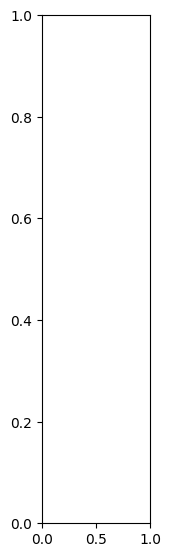

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

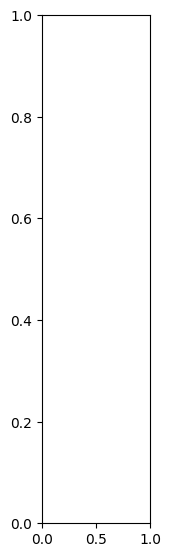

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

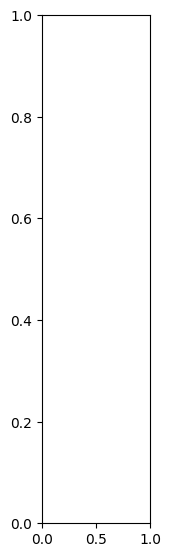

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

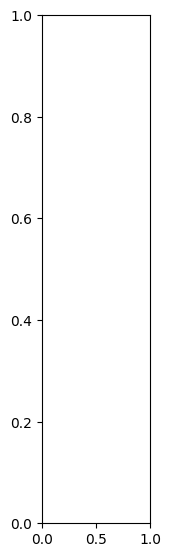

<Figure size 640x480 with 0 Axes>

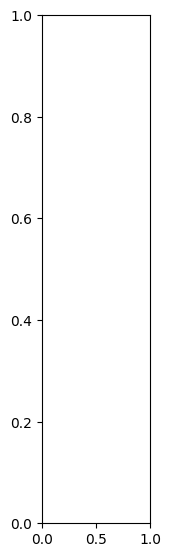

<Figure size 640x480 with 0 Axes>

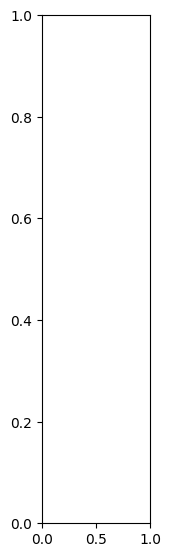

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

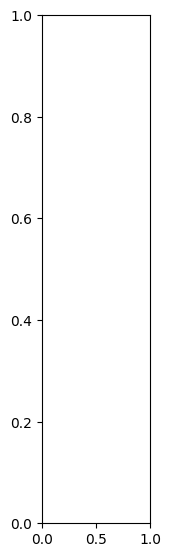

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

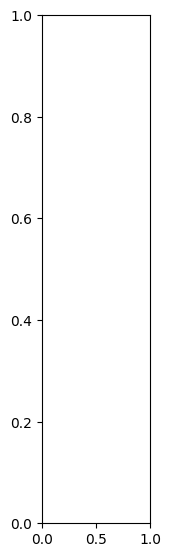

In [3]:
def run(di, di_scale, selected_stations, stations_group_name, start_date, end_date):
    
    group_dir = os.path.join(RESULTS_DIR, stations_group_name)
    os.makedirs(group_dir, exist_ok=True)
    
    scale_dir = os.path.join(group_dir, f'{di}_{di_scale}')
    os.makedirs(scale_dir, exist_ok=True)
    
    # Select Columns
    selected_columns = [
        'Station_Name', 'Station_ID',
        'Station_Latitude', 'Station_Longitude', 'Station_Elevation',
        'Date',
        f'{di}_{di_scale}',
        f'GPM_{di}_{di_scale}',
        f'ERA5_{di}_{di_scale}',
        'ERA5_Precipitation',
        'GPM_Precipitation',
        'PET_MOD16A2GF',
        'NDVI', 'EVI',
        'LSTDay', 'LSTNight', 'LST',
        'PCI_GPM', 'PCI_ERA5',
        'VCI', 'TCI', 'VHI',
        'CI_GPM', 'CI_ERA5',
    ]
    
    df = data\
    .filter(items=selected_columns)\
        .query("Station_Name in @selected_stations and Date >= @start_date and Date < @end_date")

    # Date, Year, Month
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    # SPI and SPEI Class
    df[f'{di}_{di_scale}_Class'] = pd.cut(df[f'{di}_{di_scale}'], bins=[-10, -2, -1.5, -1, 1, 1.5, 2, 10], labels=['ED', 'SD', 'MD', 'NN', 'MW', 'VW', 'EW'])

    # Month Sin & Cos
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
            
    # LST Diff
    df['LST_Diff'] = df['LSTDay'] - df['LSTNight']

    # Convert to Category
    df['Station_ID'] = df['Station_ID'].astype('category')
    df['Year'] = df['Year'].astype('category')
    df['Month'] = df['Month'].astype('category')
    df[f'{di}_{di_scale}_Class'] = df[f'{di}_{di_scale}_Class'].astype('category')
    
    df.dropna(inplace=True)
    df.sort_values(by=['Station_ID', 'Year', 'Month'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    selected_columns_lag_roll = [
        'ERA5_Precipitation',
        'GPM_Precipitation',
        f'GPM_{di}_{di_scale}',
        f'ERA5_{di}_{di_scale}',
        'PET_MOD16A2GF',
        'NDVI', 'EVI',
        'LSTDay', 'LSTNight', 'LST',
        'PCI_GPM', 'PCI_ERA5',
        'VCI', 'TCI', 'VHI',
        'CI_GPM', 'CI_ERA5',
    ]

    # Add Lag
    for lag in range(1, 4):
        for col in selected_columns_lag_roll:
            df[f'{col}_lag_{lag}'] = df.groupby('Station_ID', observed=False)[col].shift(lag)


    # Add Mean and Std Roll
    for r in [3, 6]:
        for col in selected_columns_lag_roll:
            df[f'{col}_roll_mean_{r}'] = df.groupby('Station_ID', observed=False)[col].transform(lambda x: x.rolling(window=r, min_periods=1).mean())
            df[f'{col}_roll_std_{r}'] = df.groupby('Station_ID', observed=False)[col].transform(lambda x: x.rolling(window=r, min_periods=1).std())
    
    
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Define columns to exclude from features
    EXCLUDE_COLS = ['Station_Name', 'Station_ID', 'Date', f'{di}_{di_scale}_Class', f'{di}_{di_scale}', 'Year', 'Month']
    FEATURES = [col for col in df.columns if col not in EXCLUDE_COLS]

    # Station-wise standardization
    df_scaled = df.copy()
    for station in df_scaled['Station_Name'].unique():
        station_mask = df_scaled['Station_Name'] == station
        scaler = StandardScaler()
        df_scaled.loc[station_mask, FEATURES] = scaler.fit_transform(df_scaled.loc[station_mask, FEATURES])


    class_counts = df_scaled[f'{di}_{di_scale}_Class'].value_counts()
    classes_to_remove = class_counts[class_counts < 2].index

    if not classes_to_remove.empty:
        print(f"Removing classes with fewer than 2 samples: {classes_to_remove.tolist()}")
        
        # Filter the dataframe to exclude these rare classes
        df_filtered = df_scaled[~df_scaled[f'{di}_{di_scale}_Class'].isin(classes_to_remove)].copy()
        
        # Redefine X and y from the filtered dataframe
        X = df_filtered[FEATURES]
        y = df_filtered[f'{di}_{di_scale}_Class']
        
        print(f"Data shape after removing rare classes: {X.shape}")
        print("\n--- Final Class Distribution ---")
        print(y.value_counts())
    else:
        print("No classes with fewer than 2 samples found.")
        X = df_scaled[FEATURES]
        y = df_scaled[f'{di}_{di_scale}_Class']

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y_encoded,
        test_size=0.30,
        random_state=42,
        stratify=y_encoded
    )

    print(f"Target Classes: {le.classes_}")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")


    # The estimator that will be used by RFECV
    estimator = RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    )

    # The RFECV object
    rfecv = RFECV(
        estimator=estimator,
        step=1,
        cv=StratifiedKFold(5),
        scoring='f1_macro',
        n_jobs=-1
    )

    # Fit RFECV on the training data
    rfecv.fit(X_train, y_train)

    print(f"Optimal number of features found: {rfecv.n_features_}")

    # Get the final selected features
    final_features = X_train.columns[rfecv.support_]
    print(f"Selected features: {final_features.tolist()}")
    
    features_path = os.path.join(scale_dir, 'selected_features.txt')
    with open(features_path, 'w') as f:
        for feature in final_features:
            f.write(f"{feature}\n")
    print(f"Selected features saved to {features_path}")

    # --- Plot Feature Importances ---
    # The `rfecv.estimator_` attribute is the model trained on the full set of features
    # during the last step of the cross-validation process. We can use its feature importances.
    importances = rfecv.estimator_.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': final_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot only the selected features
    selected_feature_importances = feature_importance_df[feature_importance_df['Feature'].isin(final_features)]

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=selected_feature_importances)
    plt.title('Feature Importances for Selected Features (from RFECV)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    fig_path = os.path.join(scale_dir, 'feature_importances.png')
    plt.savefig(fig_path)
    plt.close()


    # Update training and testing sets with selected features
    X_train_final = X_train[final_features]
    X_test_final = X_test[final_features]
    
    
    def objective(trial):
        """Define the objective function for Optuna to optimize."""
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'max_depth': trial.suggest_int('max_depth', 5, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
            'max_features': trial.suggest_float('max_features', 0.1, 1.0),
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
            'random_state': 42,
            'n_jobs': -1
        }
        
        model = RandomForestClassifier(**params)
        
        # Stratified K-Fold Cross-Validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f1_scores = []
        
        for train_idx, val_idx in skf.split(X_train_final, y_train):
            X_train_fold, X_val_fold = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
            y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
            
            model.fit(X_train_fold, y_train_fold)
            preds = model.predict(X_val_fold)
            f1_scores.append(f1_score(y_val_fold, preds, average='macro'))
            
        return np.mean(f1_scores)

    # Create a study object and optimize
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100, timeout=600) # 50 trials or 10 minutes

    # Save best parameters
    best_params = study.best_params 
    params_path = os.path.join(scale_dir, 'best_params.json')
    with open(params_path, 'w') as f:
        json.dump(best_params, f, indent=4)
    print(f"Best parameters saved to {params_path}")

    print(f"Best trial found: {study.best_trial.number}")
    print(f"Best Macro-F1 Score: {study.best_value}")
    print("Best Hyperparameters:")
    print(study.best_params)



    # Get best hyperparameters
    best_params = study.best_params
    best_params['random_state'] = 42
    best_params['n_jobs'] = -1

    # Train the final model
    final_model = RandomForestClassifier(**best_params)
    final_model.fit(X_train_final, y_train)

    # Make predictions on the test set
    y_pred = final_model.predict(X_test_final)

    # Save evaluation metrics
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    metrics_path = os.path.join(scale_dir, 'evaluation_metrics.txt')
    with open(metrics_path, 'w') as f:
        f.write(f"Overall Accuracy: {accuracy:.4f}\n")
        f.write(f"Macro-F1 Score: {macro_f1:.4f}\n")
        f.write(f"Cohen's Kappa: {kappa:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(report)
    print(f"Evaluation metrics saved to {metrics_path}")

    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Macro-F1 Score: {macro_f1:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


    # --- Plot Confusion Matrix ---
    print("\n--- Plotting Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    fig_path = os.path.join(scale_dir, 'confusion_matrix.png')
    plt.savefig(fig_path)
    plt.close()
        

    # Create SHAP explainer for the final model
    # Using a subset of the training data for the background is a common practice for performance
    explainer = shap.TreeExplainer(final_model, X_train_final.sample(100, random_state=42))
    shap_values = explainer.shap_values(X_test_final)

    try:
        # SHAP Summary Plot (Bar)
        print("\nGenerating SHAP Summary Bar Plot...")
        plt.figure()
        shap.summary_plot(shap_values, X_test_final, plot_type="bar", class_names=le.classes_, show=False)
        plt.title("SHAP Summary Plot (Global Feature Importance)")
        plt.tight_layout()
        fig_path = os.path.join(scale_dir, 'shap_summary_bar.png')
        plt.savefig(fig_path, bbox_inches='tight')
        plt.close()
    except:
        print("An exception occurred: Generating SHAP Summary Bar Plot...")
        
    try:
        # SHAP Summary Plot (Beeswarm)
        print("\nGenerating SHAP Summary Beeswarm Plot...")
        plt.figure()
        shap.summary_plot(shap_values, X_test_final, class_names=le.classes_, show=False,  plot_type="violin")
        plt.title("SHAP Summary Plot (Beeswarm)")
        plt.tight_layout()
        fig_path = os.path.join(scale_dir, 'shap_summary_beeswarm.png')
        plt.savefig(fig_path, bbox_inches='tight')
        plt.close()
    except:
        print("An exception occurred: SHAP Summary Plot (Beeswarm)")
    
    return None



for di in ['SPEI', 'SPI']:
    for di_scale in [3, 6, 9, 12, 18, 24]:
        for stations_group_name in ['ALL', 'G1', 'G2', 'G3']: 
                       
            if stations_group_name == 'ALL':
                selected_stations = ['Ramsar', 'Nowshahr', 'Siahbisheh', 'Kiyasar', 'Kojur', 'Baladeh', 'Alasht', 'Babolsar', 'Gharakhil', 'Sari', 'Sari (dasht-e-naz airport)', 'Galugah', 'Bandar-e-amirabad', 'Amol', 'Polsefid']
            elif stations_group_name == 'G1':
                selected_stations = ['Ramsar', 'Nowshahr']
            elif stations_group_name == 'G2':
                selected_stations = ['Siahbisheh', 'Kiyasar', 'Kojur', 'Baladeh', 'Alasht']
            elif stations_group_name == 'G3':
                selected_stations = ['Babolsar', 'Gharakhil', 'Sari', 'Sari (dasht-e-naz airport)', 'Galugah', 'Bandar-e-amirabad', 'Amol', 'Polsefid']
            else:
                selected_stations = ['Ramsar', 'Nowshahr', 'Siahbisheh', 'Kiyasar', 'Kojur', 'Baladeh', 'Alasht', 'Babolsar', 'Gharakhil', 'Sari', 'Sari (dasht-e-naz airport)', 'Galugah', 'Bandar-e-amirabad', 'Amol', 'Polsefid']

            ex_dir = os.path.join(RESULTS_DIR, stations_group_name, f'{di}_{di_scale}')
            if os.path.exists(ex_dir):
                continue 
            
            run(
                di=di,
                di_scale=di_scale,
                selected_stations=selected_stations,
                stations_group_name=stations_group_name,
                start_date='2006-09', 
                end_date='2023-10'
            )

# Select Columns and Rows

In [ ]:
# Select Drought Index and Period
di = 'SPEI'
di_scale = 3

# Select Stations
selected_stations = ['Ramsar', 'Nowshahr', 'Siahbisheh', 'Kiyasar', 'Kojur', 'Baladeh', 'Alasht', 'Babolsar', 'Gharakhil', 'Sari', 'Sari (dasht-e-naz airport)', 'Galugah', 'Bandar-e-amirabad', 'Amol', 'Polsefid']
# selected_stations = ['Ramsar', 'Nowshahr']
# selected_stations = ['Siahbisheh', 'Kiyasar', 'Kojur', 'Baladeh', 'Alasht']
# selected_stations = ['Babolsar', 'Gharakhil', 'Sari', 'Sari (dasht-e-naz airport)', 'Galugah', 'Bandar-e-amirabad', 'Amol', 'Polsefid']

# Select Columns
selected_columns = [
    'Station_Name', 'Station_ID',
    'Station_Latitude', 'Station_Longitude', 'Station_Elevation',
    'Date',
    f'{di}_{di_scale}',
    f'GPM_{di}_{di_scale}',
    f'ERA5_{di}_{di_scale}',
    'ERA5_Precipitation',
    'GPM_Precipitation',
    'PET_MOD16A2GF',
    'NDVI', 'EVI',
    'LSTDay', 'LSTNight', 'LST',
    'PCI_GPM', 'PCI_ERA5',
    'VCI', 'TCI', 'VHI',
    'CI_GPM', 'CI_ERA5',
]

# Select Start and End Date
start_date = '2006-09'
end_date = '2023-10'

# Filter Data

In [ ]:
df = data\
    .filter(items=selected_columns)\
        .query("Station_Name in @selected_stations and Date >= @start_date and Date < @end_date")

# Add Some Columns

In [ ]:
# Date, Year, Month
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# SPI and SPEI Class
df[f'{di}_{di_scale}_Class'] = pd.cut(df[f'{di}_{di_scale}'], bins=[-10, -2, -1.5, -1, 1, 1.5, 2, 10], labels=['ED', 'SD', 'MD', 'NN', 'MW', 'VW', 'EW'])

# Month Sin & Cos
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
        
# LST Diff
df['LST_Diff'] = df['LSTDay'] - df['LSTNight']

# Convert to Category
df['Station_ID'] = df['Station_ID'].astype('category')
df['Year'] = df['Year'].astype('category')
df['Month'] = df['Month'].astype('category')
df[f'{di}_{di_scale}_Class'] = df[f'{di}_{di_scale}_Class'].astype('category')

In [ ]:
df.dropna(inplace=True)
df.sort_values(by=['Station_ID', 'Year', 'Month'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
selected_columns_lag_roll = [
    'ERA5_Precipitation',
    'GPM_Precipitation',
    f'GPM_{di}_{di_scale}',
    f'ERA5_{di}_{di_scale}',
    'PET_MOD16A2GF',
    'NDVI', 'EVI',
    'LSTDay', 'LSTNight', 'LST',
    'PCI_GPM', 'PCI_ERA5',
    'VCI', 'TCI', 'VHI',
    'CI_GPM', 'CI_ERA5',
]

# Add Lag
for lag in range(1, 4):
    for col in selected_columns_lag_roll:
        df[f'{col}_lag_{lag}'] = df.groupby('Station_ID', observed=False)[col].shift(lag)


# Add Mean and Std Roll
for r in [3, 6]:
    for col in selected_columns_lag_roll:
        df[f'{col}_roll_mean_{r}'] = df.groupby('Station_ID', observed=False)[col].transform(lambda x: x.rolling(window=r, min_periods=1).mean())
        df[f'{col}_roll_std_{r}'] = df.groupby('Station_ID', observed=False)[col].transform(lambda x: x.rolling(window=r, min_periods=1).std())

# Remove all NA

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Station-wise Standardization

In [ ]:
# Define columns to exclude from features
EXCLUDE_COLS = ['Station_Name', 'Station_ID', 'Date', f'{di}_{di_scale}_Class', f'{di}_{di_scale}', 'Year', 'Month']
FEATURES = [col for col in df.columns if col not in EXCLUDE_COLS]

# Station-wise standardization
df_scaled = df.copy()
for station in df_scaled['Station_Name'].unique():
    station_mask = df_scaled['Station_Name'] == station
    scaler = StandardScaler()
    df_scaled.loc[station_mask, FEATURES] = scaler.fit_transform(df_scaled.loc[station_mask, FEATURES])


class_counts = df_scaled[f'{di}_{di_scale}_Class'].value_counts()
classes_to_remove = class_counts[class_counts < 2].index

if not classes_to_remove.empty:
    print(f"Removing classes with fewer than 2 samples: {classes_to_remove.tolist()}")
    
    # Filter the dataframe to exclude these rare classes
    df_filtered = df_scaled[~df_scaled[f'{di}_{di_scale}_Class'].isin(classes_to_remove)].copy()
    
    # Redefine X and y from the filtered dataframe
    X = df_filtered[FEATURES]
    y = df_filtered[f'{di}_{di_scale}_Class']
    
    print(f"Data shape after removing rare classes: {X.shape}")
    print("\n--- Final Class Distribution ---")
    print(y.value_counts())
else:
    print("No classes with fewer than 2 samples found.")
    X = df_scaled[FEATURES]
    y = df_scaled[f'{di}_{di_scale}_Class']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.30,
    random_state=42,
    stratify=y_encoded
)

print(f"Target Classes: {le.classes_}")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Feature Selection with RFECV

In [ ]:
# The estimator that will be used by RFECV
estimator = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# The RFECV object
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=StratifiedKFold(5),
    scoring='f1_macro',
    n_jobs=-1
)

# Fit RFECV on the training data
rfecv.fit(X_train, y_train)

print(f"Optimal number of features found: {rfecv.n_features_}")

# Get the final selected features
final_features = X_train.columns[rfecv.support_]
print(f"Selected features: {final_features.tolist()}")

# --- Plot Feature Importances ---
# The `rfecv.estimator_` attribute is the model trained on the full set of features
# during the last step of the cross-validation process. We can use its feature importances.
importances = rfecv.estimator_.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': final_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot only the selected features
selected_feature_importances = feature_importance_df[feature_importance_df['Feature'].isin(final_features)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=selected_feature_importances)
plt.title('Feature Importances for Selected Features (from RFECV)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Update training and testing sets with selected features
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Hyperparameter Tuning with Optuna

In [ ]:
def objective(trial):
    """Define the objective function for Optuna to optimize."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = RandomForestClassifier(**params)
    
    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    
    for train_idx, val_idx in skf.split(X_train_final, y_train):
        X_train_fold, X_val_fold = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
        
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        f1_scores.append(f1_score(y_val_fold, preds, average='macro'))
        
    return np.mean(f1_scores)

# Create a study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600) # 50 trials or 10 minutes

print(f"Best trial found: {study.best_trial.number}")
print(f"Best Macro-F1 Score: {study.best_value}")
print("Best Hyperparameters:")
print(study.best_params)


# Model Training & Evaluation

In [ ]:
# Get best hyperparameters
best_params = study.best_params
best_params['random_state'] = 42
best_params['n_jobs'] = -1

# Train the final model
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro-F1 Score: {macro_f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


# --- Plot Confusion Matrix ---
print("\n--- Plotting Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Explainability with SHAP

In [ ]:
# Create SHAP explainer for the final model
# Using a subset of the training data for the background is a common practice for performance
explainer = shap.TreeExplainer(final_model, X_train_final.sample(100, random_state=42))
shap_values = explainer.shap_values(X_test_final)

# SHAP Summary Plot (Bar)
print("\nGenerating SHAP Summary Bar Plot...")
plt.figure()
shap.summary_plot(shap_values, X_test_final, plot_type="bar", class_names=le.classes_, show=False)
plt.title("SHAP Summary Plot (Global Feature Importance)")
plt.tight_layout()
plt.show()

# SHAP Summary Plot (Beeswarm)
print("\nGenerating SHAP Summary Beeswarm Plot...")
plt.figure()
shap.summary_plot(shap_values, X_test_final, class_names=le.classes_, show=False,  plot_type="violin")
plt.title("SHAP Summary Plot (Beeswarm)")
plt.tight_layout()
plt.show()